In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly.express as px
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.color_palette("Paired")
sns.set_palette("Paired")

# Importing Data

In [2]:
#Read dataset function
def read_data(path):
    df = pd.read_csv(path)
    print('Data shape:', df.shape)
    
    return df

In [3]:
#Dataset name/path
path = 'fraud_test.csv'

#Read the data
df = read_data(path = path)
df.head()

Data shape: (305184, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df.rename(columns={"Unnamed: 0":"id"}, inplace=True)

In [5]:
df['merchant'] = df['merchant'].str.replace("fraud_","")

In [6]:
df[['trans_date', 'trans_time']] = df['trans_date_trans_time'].str.split(' ', expand=True)
df.head(5)

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,0,21/06/2020 12:14,2.291160e+15,Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,21/06/2020,12:14
1,1,21/06/2020 12:14,3.573030e+15,Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,21/06/2020,12:14
2,2,21/06/2020 12:14,3.598220e+15,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,21/06/2020,12:14
3,3,21/06/2020 12:15,3.591920e+15,Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,21/06/2020,12:15
4,4,21/06/2020 12:15,3.526830e+15,Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,21/06/2020,12:15


In [7]:
# convert to date
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['trans_time'] = pd.to_datetime(df['trans_time'], format= '%H:%M').dt.time
df['trans_month'] = df['trans_date'].dt.to_period('M').astype("str")
df['trans_dayofweek'] = df['trans_date'].dt.day_name()

In [8]:
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (2020 - df['dob'].dt.year)

In [9]:
df.head(5)

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,trans_month,trans_dayofweek,age
0,0,2020-06-21 12:14:00,2.291160e+15,Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12:14:00,2020-06,Sunday,52
1,1,2020-06-21 12:14:00,3.573030e+15,Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:00,2020-06,Sunday,30
2,2,2020-06-21 12:14:00,3.598220e+15,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12:14:00,2020-06,Sunday,50
3,3,2020-06-21 12:15:00,3.591920e+15,Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12:15:00,2020-06,Sunday,33
4,4,2020-06-21 12:15:00,3.526830e+15,Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12:15:00,2020-06,Sunday,65


In [10]:
def apply_age_group(age):
    if(age <= 18):
        return "Teenager"
    elif (age <= 25):
        return "Young Adult"
    elif(age<= 64):
        return "Adult"
    else:
        return "Elder"

df['age_group'] = df['age'].apply(apply_age_group)

In [11]:
df = df.drop(['cc_num', 'street', 'zip', 'city_pop', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'first', 'last', 'dob', 'lat', 'long','trans_date_trans_time','dob','trans_date'], axis=1)

In [12]:
def apply_time_group(time):
    hours = [i for i in range(0, 24)]
    result = ''
    for hr in hours:
        if time >= datetime.time(hr,0,0) and time <= datetime.time(hr,59,0):
            result = result + str(hr) + "-" + str(hr+1) + "h"
            if hr < 10:
                result = "0" + result
    return result

df['trans_time_group'] = df['trans_time'].apply(apply_time_group)

In [13]:
df.head(5)

,id,merchant,category,amt,gender,city,state,job,is_fraud,trans_time,trans_month,trans_dayofweek,age,age_group,trans_time_group
0,0,Kirlin and Sons,personal_care,2.86,M,Columbia,SC,Mechanical engineer,0,12:14:00,2020-06,Sunday,52,Adult,12-13h
1,1,Sporer-Keebler,personal_care,29.84,F,Altonah,UT,"Sales professional, IT",0,12:14:00,2020-06,Sunday,30,Adult,12-13h
2,2,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,"Librarian, public",0,12:14:00,2020-06,Sunday,50,Adult,12-13h
3,3,Haley Group,misc_pos,60.05,M,Titusville,FL,Set designer,0,12:15:00,2020-06,Sunday,33,Adult,12-13h
4,4,Johnston-Casper,travel,3.19,M,Falmouth,MI,Furniture designer,0,12:15:00,2020-06,Sunday,65,Elder,12-13h


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305184 entries, 0 to 305183
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                305184 non-null  int64  
 1   merchant          305184 non-null  object 
 2   category          305184 non-null  object 
 3   amt               305184 non-null  float64
 4   gender            305184 non-null  object 
 5   city              305184 non-null  object 
 6   state             305184 non-null  object 
 7   job               305184 non-null  object 
 8   is_fraud          305184 non-null  int64  
 9   trans_time        305184 non-null  object 
 10  trans_month       305184 non-null  object 
 11  trans_dayofweek   305184 non-null  object 
 12  age               305184 non-null  int32  
 13  age_group         305184 non-null  object 
 14  trans_time_group  305184 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(11)
memory usage: 33.8+ MB

In [15]:
'merchant','category','gender','city','state','job','trans_time','trans_month','trans_dayofweek','age_group','trans_time_group'

('merchant',
 'category',
 'gender',
 'city',
 'state',
 'job',
 'trans_time',
 'trans_month',
 'trans_dayofweek',
 'age_group',
 'trans_time_group')

# Splitting Data

**Split Input & Output**

In [16]:
# function split input and output
def split_input_output(data, target_column):
    """
    Function to split input (x) and output (y)

    Parameters
    ----------
    data : pd.DataFrame
        The sample data input

    target_column : str
        The output column name

    Return
    ------
    X : pd.DataFrame
        input data

    y : pd.DataFrame
        output data
    """
    X = data.drop(columns = target_column)
    y = data[target_column]
    
    # Validate
    print('X shape:', X.shape)
    print('y shape:', y.shape)
    
    return X, y

In [17]:
# Split input x and output y
X, y = split_input_output(data = df,
                         target_column = "is_fraud")

# Show 5 first rows of input
X.head()

X shape: (305184, 14)
y shape: (305184,)


,id,merchant,category,amt,gender,city,state,job,trans_time,trans_month,trans_dayofweek,age,age_group,trans_time_group
0,0,Kirlin and Sons,personal_care,2.86,M,Columbia,SC,Mechanical engineer,12:14:00,2020-06,Sunday,52,Adult,12-13h
1,1,Sporer-Keebler,personal_care,29.84,F,Altonah,UT,"Sales professional, IT",12:14:00,2020-06,Sunday,30,Adult,12-13h
2,2,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,"Librarian, public",12:14:00,2020-06,Sunday,50,Adult,12-13h
3,3,Haley Group,misc_pos,60.05,M,Titusville,FL,Set designer,12:15:00,2020-06,Sunday,33,Adult,12-13h
4,4,Johnston-Casper,travel,3.19,M,Falmouth,MI,Furniture designer,12:15:00,2020-06,Sunday,65,Elder,12-13h


In [18]:
# Show 5 first rows of output
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

**Validate the Data Dimension**

we want to validate whether the data dimensions are in accordance with the data standards in the data definition process

In [19]:
# Check data dimension
n_samples, n_features = X.shape

# Print number samples and features
print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}")

Number of samples: 305184
Number of features: 14


In [20]:
# Check data features name
features_names = X.columns

# Print name a features
print(f"name of features: {features_names}")

name of features: Index(['id', 'merchant', 'category', 'amt', 'gender', 'city', 'state', 'job',
       'trans_time', 'trans_month', 'trans_dayofweek', 'age', 'age_group',
       'trans_time_group'],
      dtype='object')


**Split Train, Valid, and Test**

In [21]:
from sklearn.model_selection import train_test_split

def split_train_valid_test(X, y, test_size, valid_size, stratify, random_state=42):
    """
    Split data into train & test

    Parameters
    ----------
    X : pd.DataFrame
        The input data

    y : pd.Series
        The output data

    test_size : float
        The proportion of number of test data to total data

    valid_size : float
        The proportion of number of validation data to total data

    stratify : pd.Series
        Reference to stratify the splitting

    random_state : int, default=42
        The random seed, for reproducibility

    Returns
    -------
    X_train : pd.DataFrame
        The input train data

    X_test : pd.DataFrame
        The input test data

    y_train : pd.Series
        The output train data

    y_test : pd.Series
        The output test data
    """
    # Split the data
    X_train, X_not_train, y_train, y_not_train = train_test_split(
        X,
        y,
        test_size = test_size + valid_size,
        stratify = stratify,
        random_state = random_state
    )

    # Then, split valid and test from not_train
    X_valid, X_test, y_valid, y_test = train_test_split(
        X_not_train,
        y_not_train,
        test_size = valid_size/(test_size + valid_size),
        stratify = y_not_train,
        random_state = random_state
    )

    # Validate
    print('X train shape:', X_train.shape)
    print('y train shape:', y_train.shape)
    print('X valid shape :', X_valid.shape)
    print('y valid shape :', y_valid.shape)
    print('X test shape :', X_test.shape)
    print('y test shape :', y_test.shape)

    return X_train, X_valid, X_test, y_train, y_valid, y_test


In [22]:
# Run the code
splitted_data = split_train_valid_test(
    X = X,
    y = y,
    test_size = 0.2,
    valid_size = 0.2,
    stratify = y,
    random_state = 42
)

X_train, X_valid, X_test, y_train, y_valid, y_test = splitted_data

X train shape: (183110, 14)
y train shape: (183110,)
X valid shape : (61037, 14)
y valid shape : (61037,)
X test shape : (61037, 14)
y test shape : (61037,)


# Exploratory Data Analysis

In [23]:
# Print train set shape
print('X train shape:', X_train.shape)
print('y train shape:', y_train.shape)

X train shape: (183110, 14)
y train shape: (183110,)


In [24]:
# Create EDA dataset
eda_df = pd.concat([X_train, y_train], axis = 1)

eda_df.head()

,id,merchant,category,amt,gender,city,state,job,trans_time,trans_month,trans_dayofweek,age,age_group,trans_time_group,is_fraud
216968,216968,Jewess LLC,shopping_pos,4.17,M,Hudson,NY,Travel agency manager,14:19:00,2020-09,Sunday,22,Young Adult,14-15h,0
198039,198039,Huels-Nolan,gas_transport,72.16,F,West Sayville,NY,Film/video editor,07:32:00,2020-08,Sunday,30,Adult,07-8h,0
57363,57363,Pacocha-O'Reilly,grocery_pos,213.43,F,Brandon,FL,Environmental consultant,11:56:00,2020-07,Saturday,42,Adult,11-12h,0
292871,292871,Hickle Group,shopping_pos,8.47,F,Tulsa,OK,"Teacher, special educational needs",15:05:00,2020-10,Friday,49,Adult,15-16h,0
125457,125457,"Kihn, Abernathy and Douglas",shopping_net,1.90,F,Oolitic,IN,Counsellor,22:39:00,2020-08,Monday,29,Adult,22-23h,0


In [25]:
# Print train set shape after concat
print('eda_df shape:', eda_df.shape)

eda_df shape: (183110, 15)


## Check for statistics descriptives

Check for the data integrity and potential outliers

In [26]:
# Check min, max, and quartile values
eda_df.describe()

,id,amt,age,is_fraud
count,183110.000000,183110.000000,183110.000000,183110.000000
mean,155485.120108,69.384903,46.677991,0.004538
std,96519.040339,147.007390,17.455878,0.067214
min,0.000000,1.000000,15.000000,0.000000
25%,76409.000000,9.670000,33.000000,0.000000
50%,152743.500000,47.330000,45.000000,0.000000
75%,228879.750000,82.997500,58.000000,0.000000
max,555718.000000,16837.080000,96.000000,1.000000


**Summary**

There are some potential extreme values on amt

## Check for missing values

Check for missing values to handle them if any

In [27]:
eda_df.isna().sum()

id                  0
merchant            0
category            0
amt                 0
gender              0
city                0
state               0
job                 0
trans_time          0
trans_month         0
trans_dayofweek     0
age                 0
age_group           0
trans_time_group    0
is_fraud            0
dtype: int64

**Summary**

There are no missing values

## Check for Distribution

Is_fraud proportion

In [28]:
eda_df["is_fraud"].value_counts(normalize = True)

is_fraud
0    0.995462
1    0.004538
Name: proportion, dtype: float64

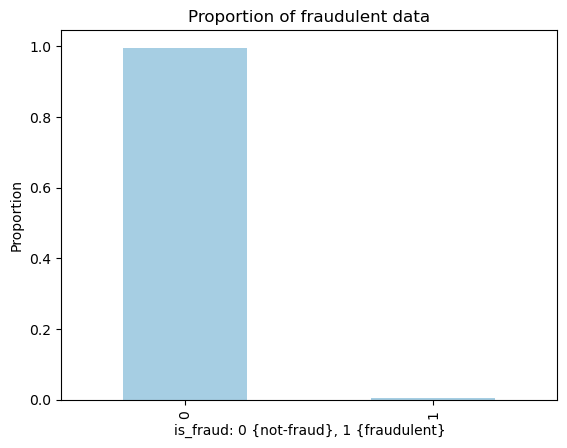

In [29]:
# Plot
(eda_df["is_fraud"].value_counts(normalize = True).plot.bar())

plt.xlabel("is_fraud: 0 {not-fraud}, 1 {fraudulent}")
plt.ylabel("Proportion")
plt.title("Proportion of fraudulent data")
plt.show()

In [30]:
def annotate_bar(ax, custom_y_func, font_size = 14):
    for p in ax.patches:
        # Calculate annotation
        value = str(round(p.get_height(), 1))
        x = (p.get_x() + p.get_width() / 2) * 0.99
        y = ((p.get_y() + p.get_height() / 2) * 0.99)
        
        y = custom_y_func(y)
        ax.annotate(value, (x,y), color="black", size= font_size,
                    ha="center", va="center")

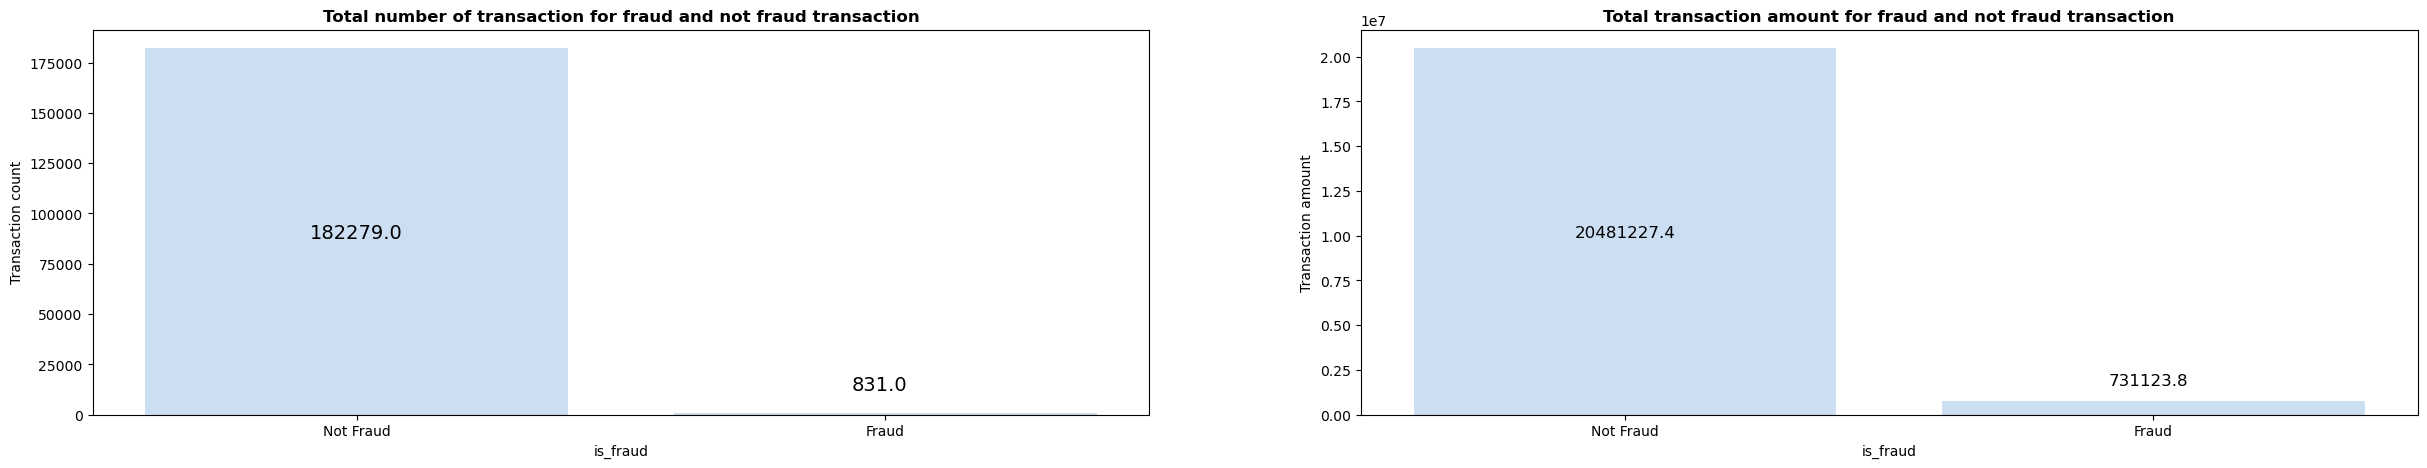

In [31]:
fig = plt.figure(figsize=(30, 5))

plt.subplot(1,2,1)
df_fraud_count = eda_df['is_fraud'].apply(lambda x: "Fraud" if x == 1 else "Not Fraud").value_counts().reset_index()
ax = sns.barplot(data = df_fraud_count, x = 'is_fraud', y = 'count', color = '#c6def8')

annotate_bar(ax, lambda y: 15000 if y < 10000 else y, font_size = 14)
plt.title('Total number of transaction for fraud and not fraud transaction', fontsize=12, fontweight='bold')
plt.ylabel("Transaction count")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

df_fraud_amount = df.groupby('is_fraud')['amt'].sum().reset_index()

plt.subplot(1,2,2)
ax = sns.barplot(data = df_fraud_amount, x = 'is_fraud', y = 'amt', color = '#c6def8')
annotate_bar(ax, lambda y: 1900000 if y < 1200000 else y, font_size = 12)

plt.title('Total transaction amount for fraud and not fraud transaction', fontsize=12, fontweight='bold')
plt.ylabel("Transaction amount")
ax.set_xticklabels(['Not Fraud', 'Fraud'], rotation = 0)
plt.show()

There's a total of 183110 transactions. In those transactions, there are 182279 valid transaction which make up 99.61%. The remaining 0.39% is the fraud cases.

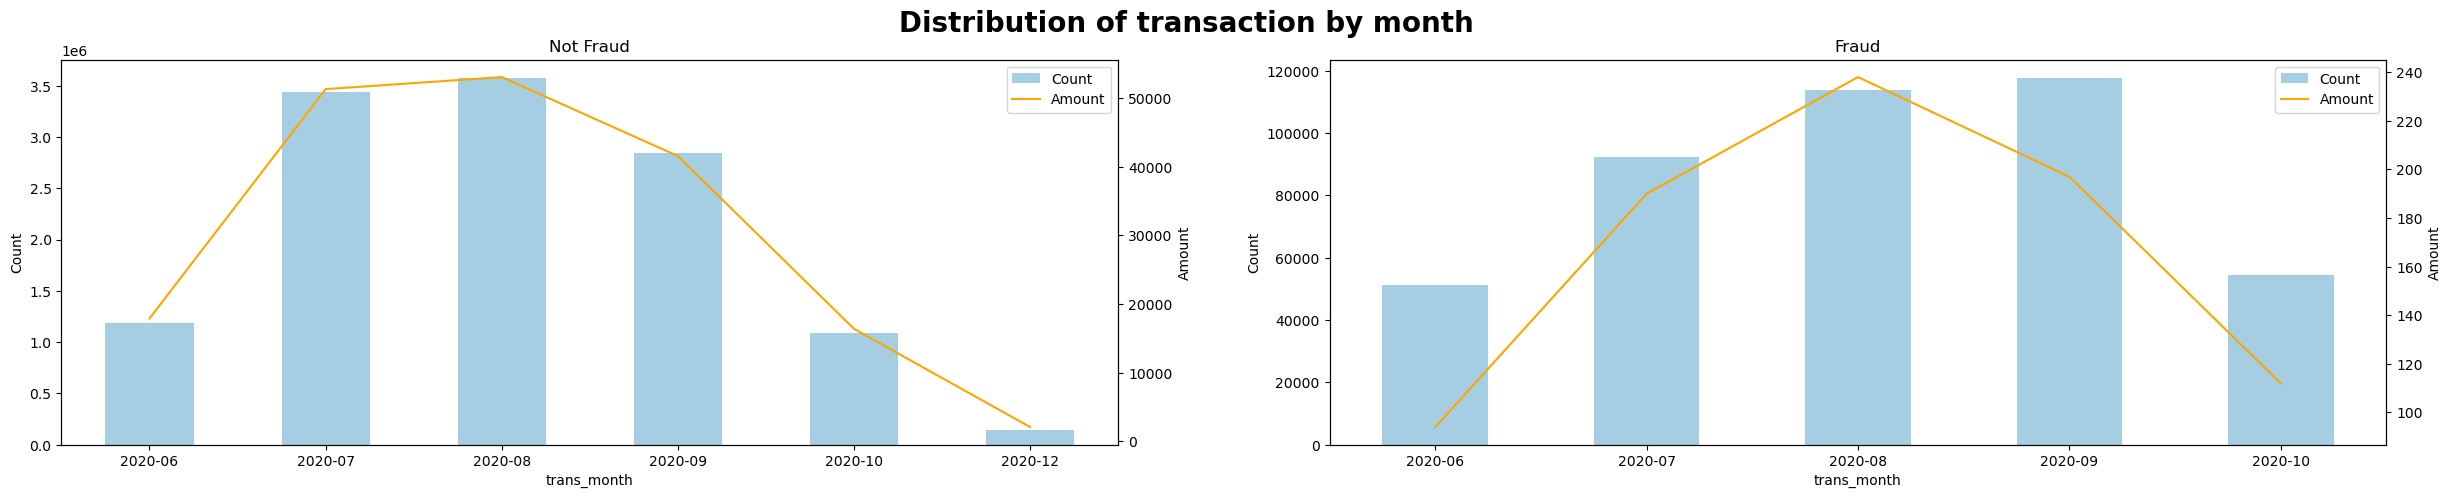

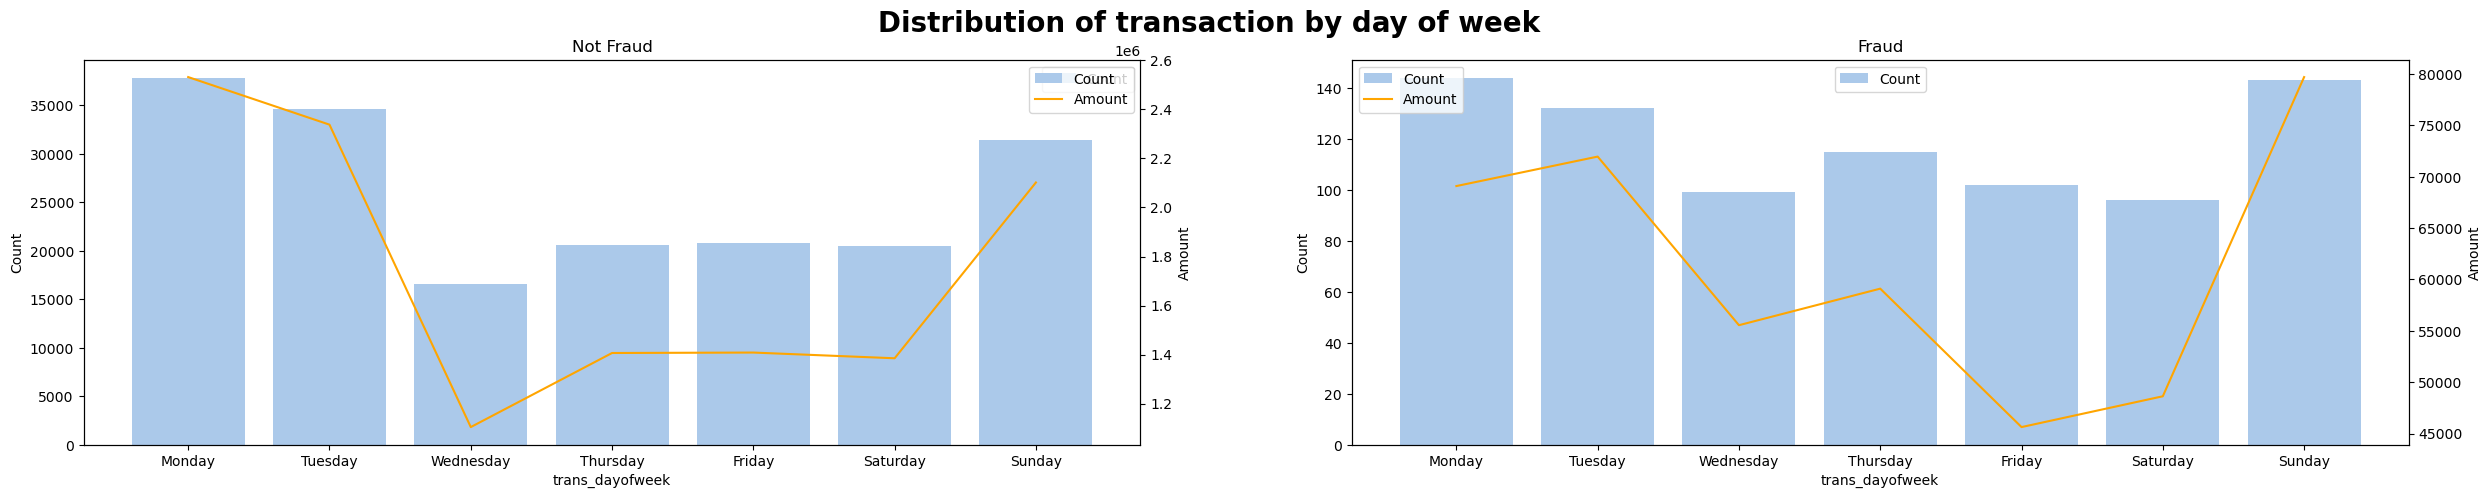

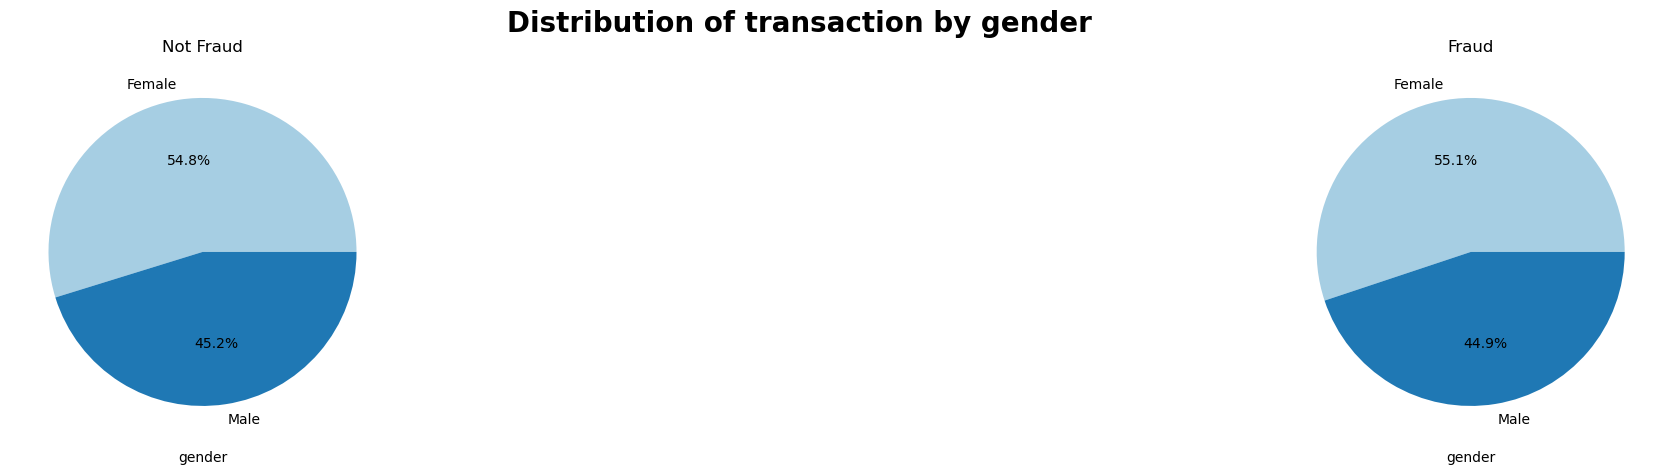

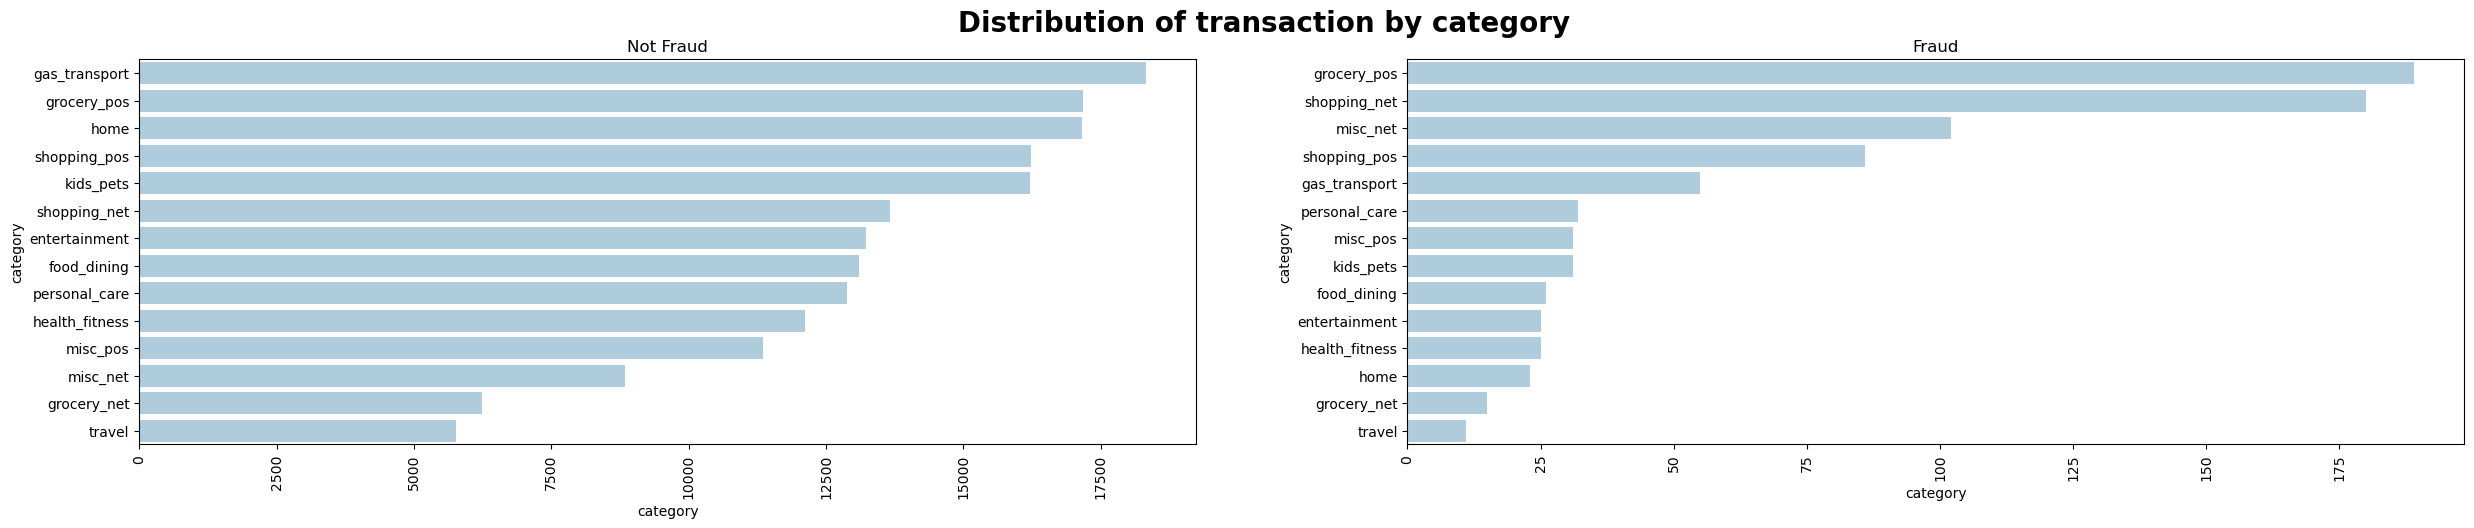

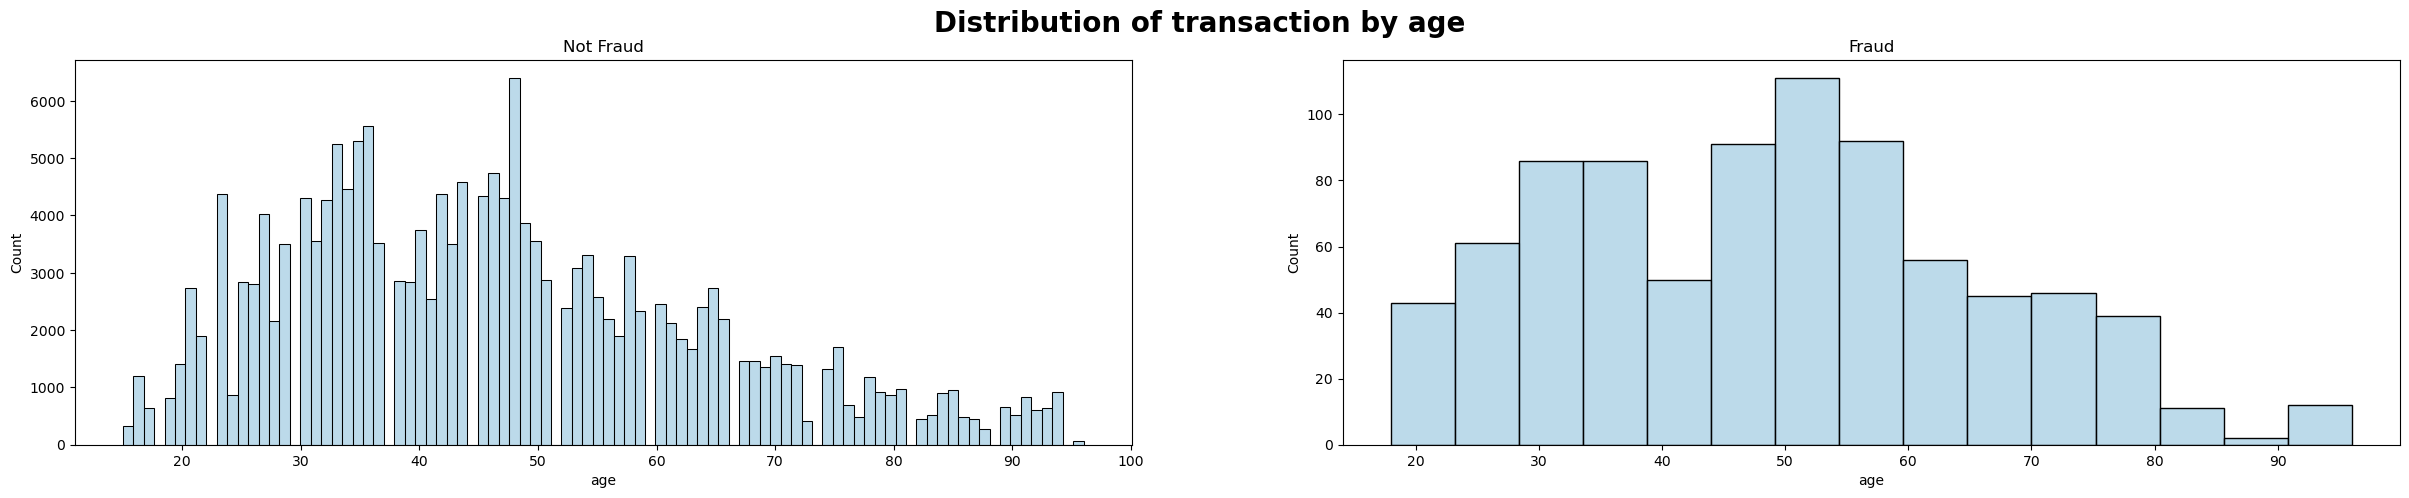

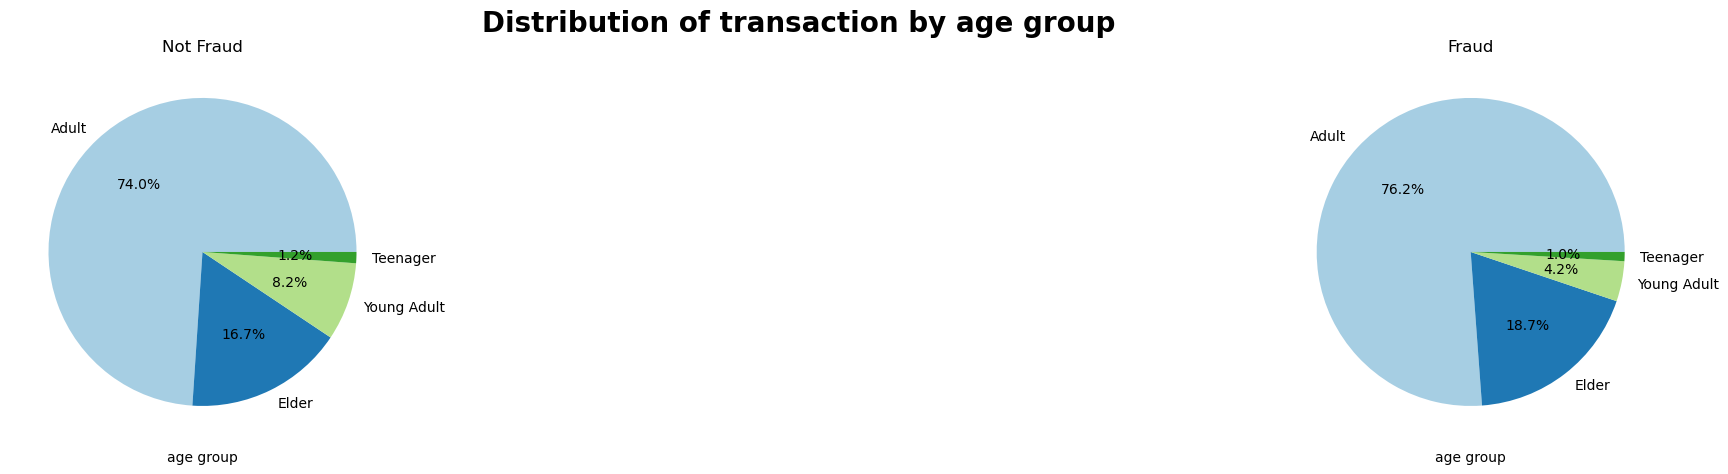

In [32]:
#ploting the overview of dataset by month, gender and category
columns = ['trans_month','trans_dayofweek','gender','category','age','age_group']
columns_name = ['month','day of week','gender','category','age','age group']
name = ['Not Fraud','Fraud']

eda_df['fraud'] = eda_df['is_fraud'].apply(lambda x: "Fraud" if x == 1 else 'Not Fraud')

index = 0
for col in columns:
    fig = plt.figure(figsize=(30, 5))
    plt.suptitle("Distribution of transaction by " + columns_name[index],fontsize=20,fontweight='bold')
    
    for i in range(0,2):
        plt.subplot(1,2,1+i)
        df_1 = eda_df[eda_df['is_fraud'] == i]
        if (col == 'trans_month'):
            ax = df_1.groupby(col)['amt'].sum().plot(kind='bar',label='Count')
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
            ax.set_ylabel('Count')
            
            plt.twinx()
            ax1 = df_1.groupby(col).size().plot(kind='line',color='orange', label='Amount')
            ax1.set_xticklabels(ax.get_xticklabels(), rotation = 0)
            ax1.set_ylabel('Amount')   
            
            chart, labels = ax.get_legend_handles_labels()
            chart1, labels1 = ax1.get_legend_handles_labels()
            ax1.legend(chart + chart1, labels + labels1, loc=0)
        elif (col == 'gender'):
            ax = plt.pie(df_1[col].value_counts(), labels = ['Female','Male'] , autopct='%1.1f%%')
        elif (col == 'age_group'):
            ax = plt.pie(df_1[col].value_counts(), labels = df_1[col].value_counts().index , autopct='%1.1f%%')
        elif (col == 'trans_dayofweek'):
            cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            ax = sns.barplot(data = df_1.groupby(col).size().reset_index(), x = col, y=0, label = 'Count'
                            , color='#a1c9f4', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
            ax.set_ylabel('Count')
            
            plt.twinx()
            
            ax1 = sns.lineplot(data = df_1.groupby(col)['amt'].sum().reindex(cats).reset_index(), x = col, y='amt', label ='Amount'
                            , color='orange')
            ax1.set_ylabel('Amount')
            
            chart, labels = ax.get_legend_handles_labels()
            chart1, labels1 = ax1.get_legend_handles_labels()
            ax1.legend(chart + chart1, labels + labels1, loc=0)
        elif (col == 'category'):
            ax = sns.countplot(data=df_1, y=col, order = df_1[col].value_counts().index)
        else:
            ax = sns.histplot(data=df_1, x=col)
        plt.title(name[i])
        plt.xlabel(columns_name[index])
    
        if col == 'category':
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    index +=1
    plt.show()

**By months**

- For 'Not Fraud' cases, 06/2020 is the month with the lowest number of transactions. In the following months, the number of transactions increased and remained stable,reaching the highest level in December.
- For 12/2020, the different is significant when comparing to previous month. That is quite understandable because December has an important holiday, Christmas. Moreover, consumer demand also often increases at the end of the year
- For Fraud case, June is still the lowest month then steadily increases as time goes by, reaching its peak in August. After reaching its peak, number of fraud transaction graudually over the following months.
- From Aug to Oct, we have high number of fraud transactions.

**Day of week**

- The 2 charts share a similar pattern that Sunday, Monday, Tuesday have the most number of transaction for both fraud and not fraud. This indicates we should pay more attentions to transactions happen on these at as they are more likely to be fraud.

**By gender**

- Based on the observation, in both types of transactions female have more transaction when compare to male. Though, the gap is not that significant.

**By category**

- For 'Not Fraud' cases, the top 3 categories are gas_transport, grocery_pos, home, with gas_transport is the highest
- For 'Fraud' cases, the top 3 categories are grocery_pos, shopping_net, and misc_net
- grocery_pos is an category we should keep an eyes on

**By age**

- For both Fraud and Not Fraud, the distribution is quite similar with Adult (26-65) have the most transaction, while Teenager have the least.
- This is quite predictable as teenager don't have a stable income yet and mainly depend on family support
- Adult is still in prime working age

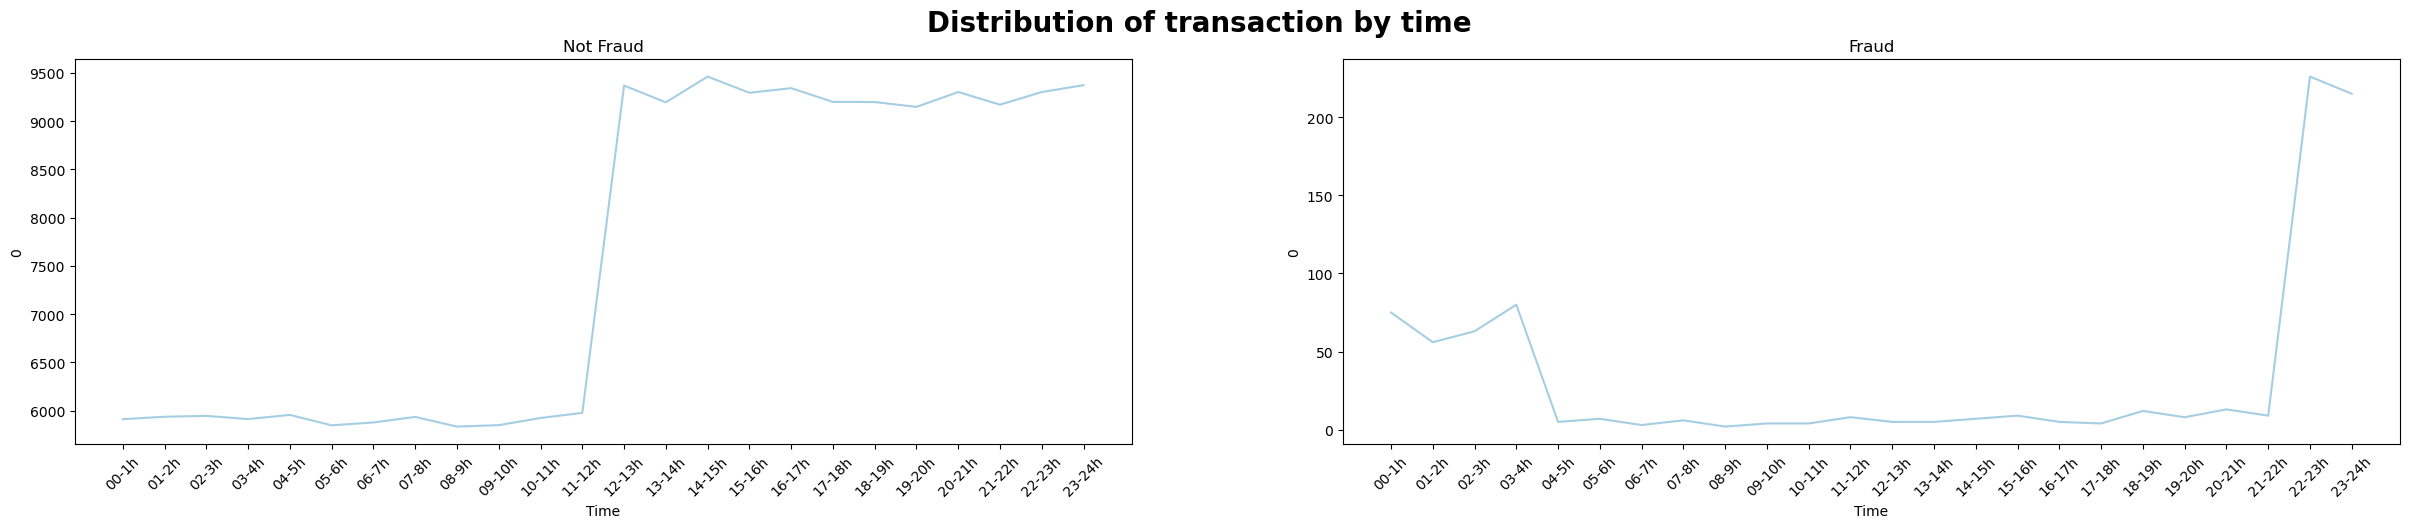

In [33]:
name = ['Not Fraud','Fraud']

fig = plt.figure(figsize=(30, 5))
plt.suptitle("Distribution of transaction by time",fontsize=20,fontweight='bold')
for i in range(0,2):
    plt.subplot(1,2,1+i)
    temp = eda_df[eda_df['is_fraud'] == i].groupby(eda_df['trans_time_group']).size().reset_index().sort_values(by='trans_time_group')
    ax = sns.lineplot(data=temp, x="trans_time_group", y=0)
    plt.title(name[i])
    plt.xlabel('Time')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

From 0h-11h, number of transaction maintain at a stable rate. From 11h - 24 is the period where people actively make transaction, hence the significant jump compare to pevious period. \ For fraud transaction, majority of the cases happen at late at night (22-24h) or early time of the date (0-4h), which implies people with bad intention will more likely to act at a time with low human monitoring.

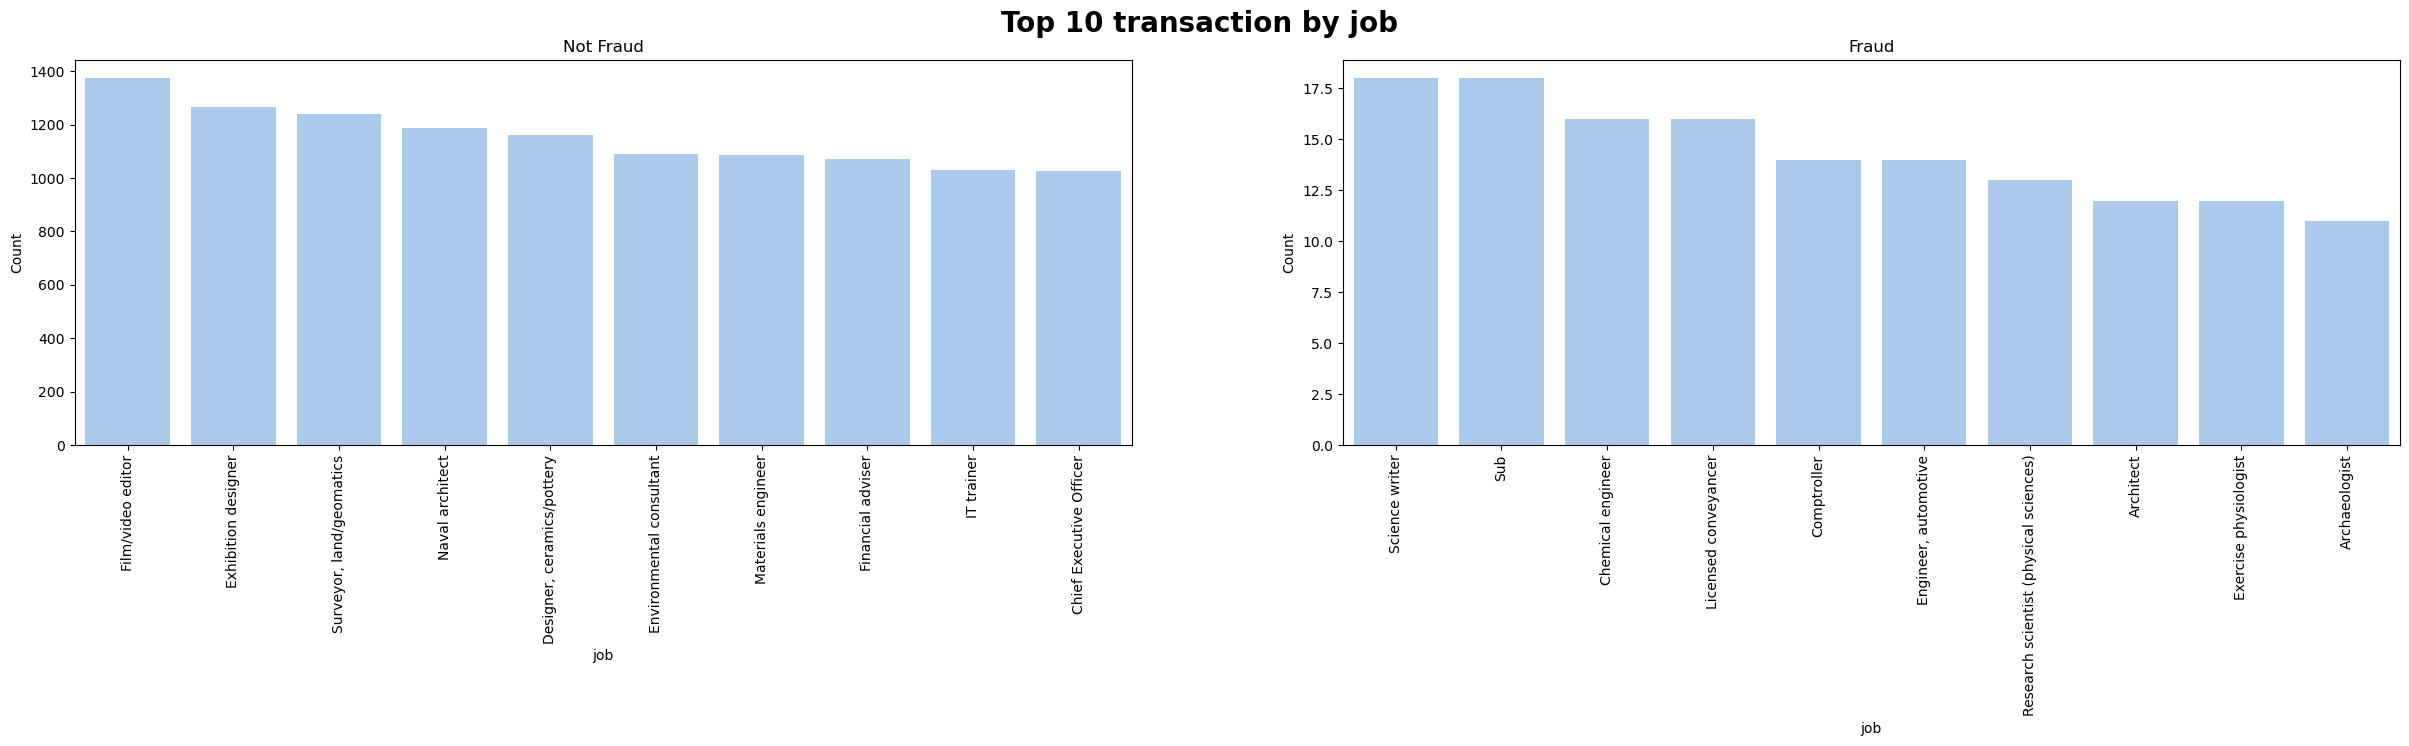

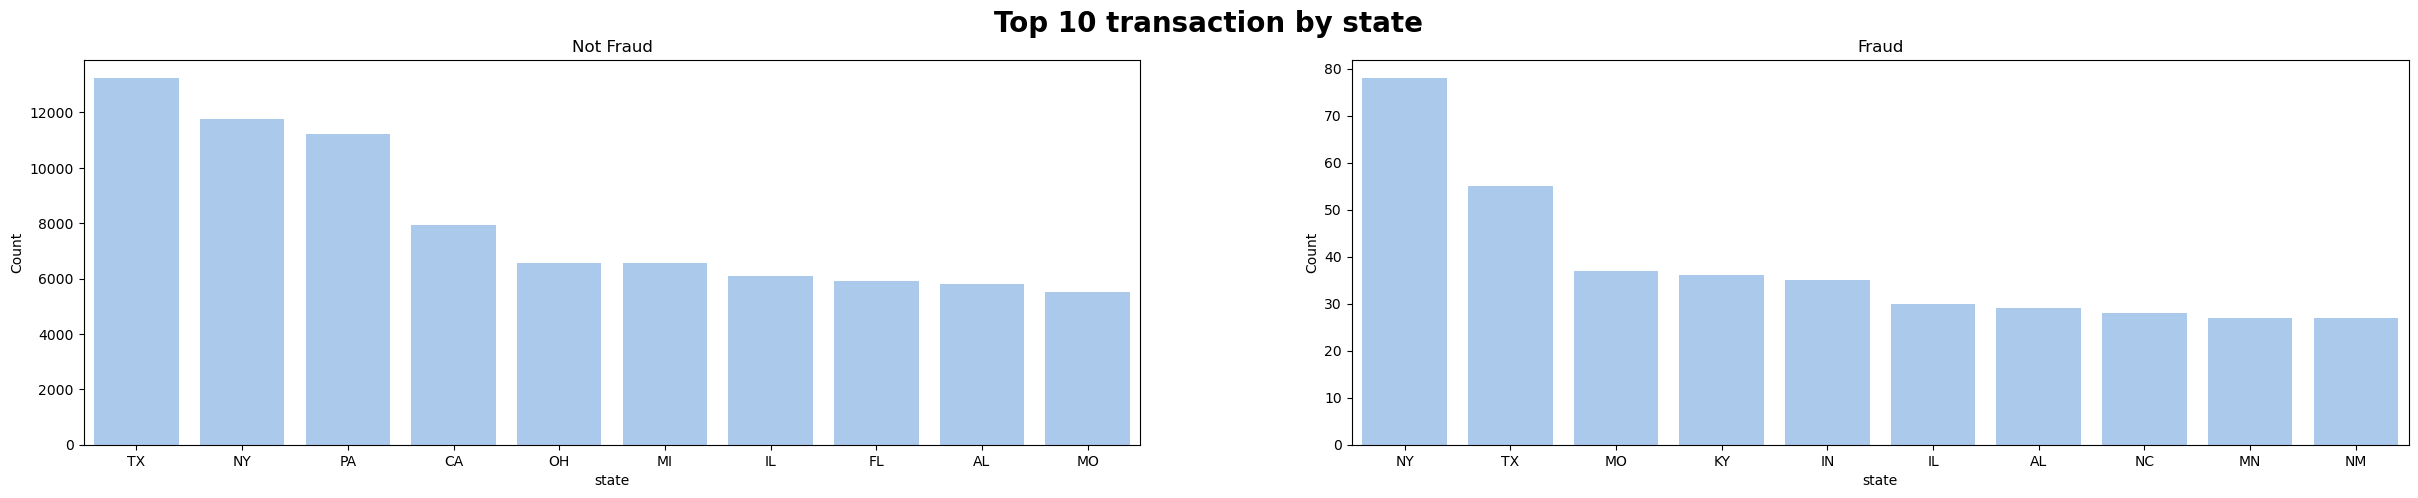

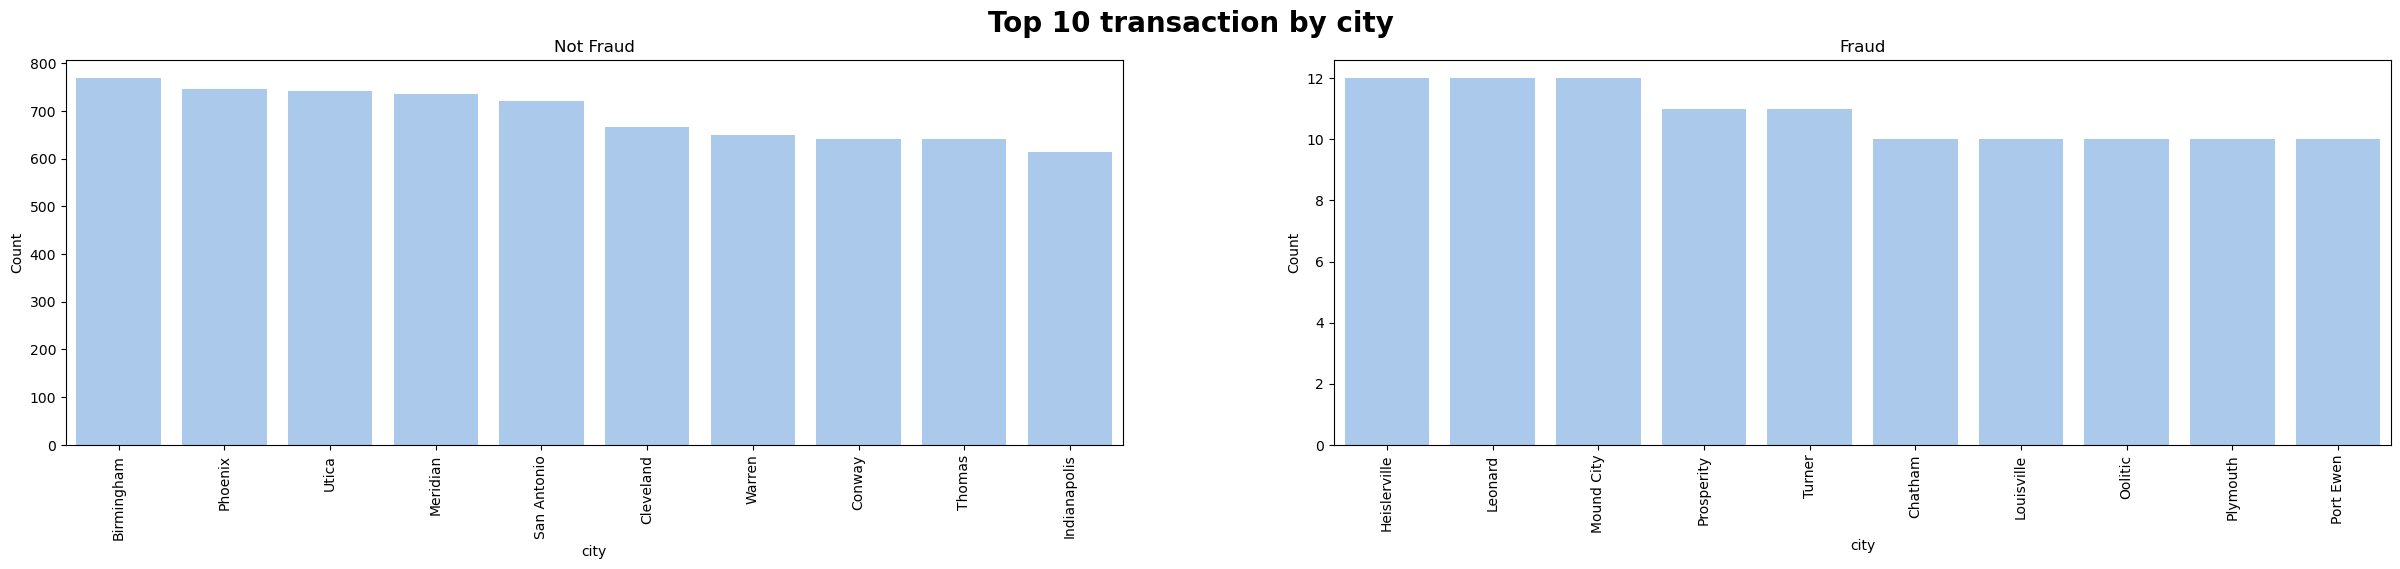

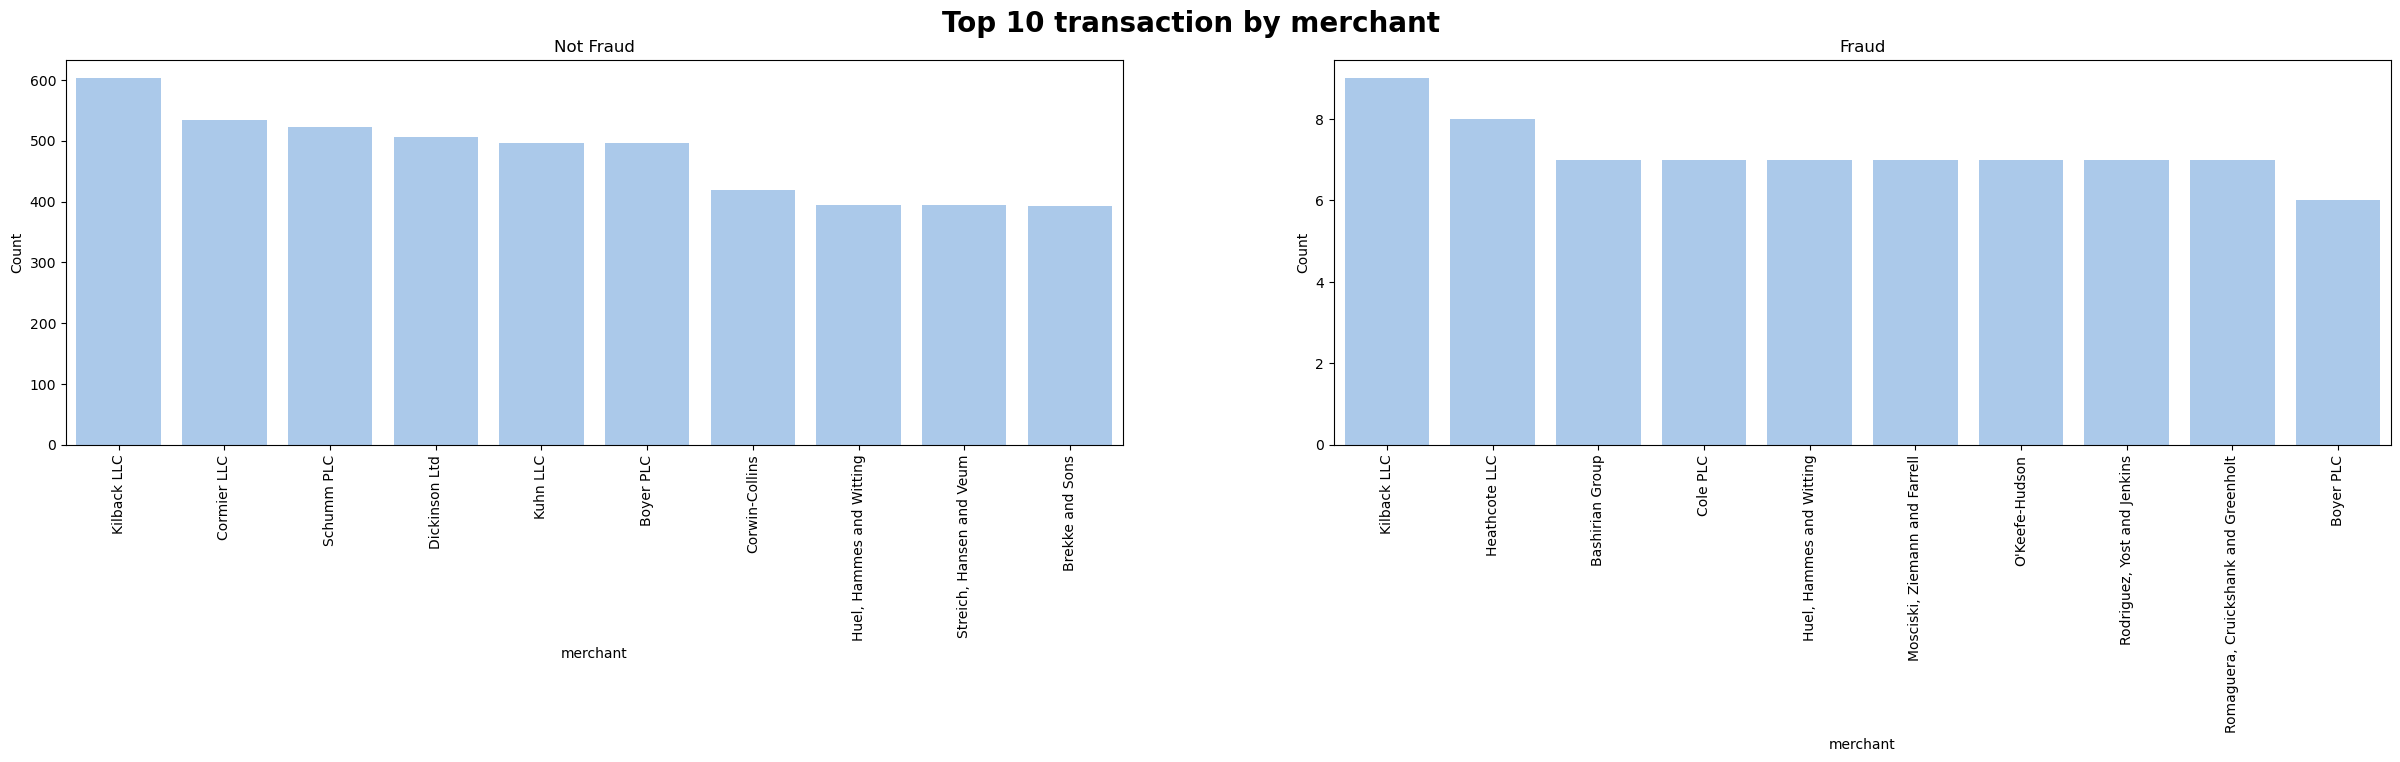

In [34]:
#By Transaction count
columns = ['job','state','city','merchant']
columns_name = ['job','state','city','merchant']
fraud = ['Not Fraud','Fraud']
y = 0 
for col in columns:
    sns.set_palette("Paired")
    name = columns_name[y]
    y += 1
    fig = plt.figure(figsize=(30, 5))
    if (col == 'trans_dayofweek'):
        plt.suptitle("Top transaction by " + name, fontsize=20,fontweight="bold")
    else:
        plt.suptitle("Top 10 transaction by " + name, fontsize=20,fontweight="bold")   
    for i in range(0,len(fraud)):
        temp_df = eda_df[eda_df['is_fraud'] == i]
        top = temp_df.groupby(col).size().nlargest(10)
        plt.subplot(1,2,1+i)
        ax = sns.barplot(data = top.reset_index(), x = col, y=0, color='#a1c9f4')
        if (col == 'state'):
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
        else:
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
        plt.ylabel('Count')
        plt.xlabel(name)
        #plt.axhline(temp_df.groupby(col).size().mean(), color='red', linestyle='--')
        plt.title(fraud[i])
    plt.show()

When observing 'Top 10 transaction' and 'Top 10 transaction amount' charts, we can see that that share similar pattern. High number of transaction also have high number of amount

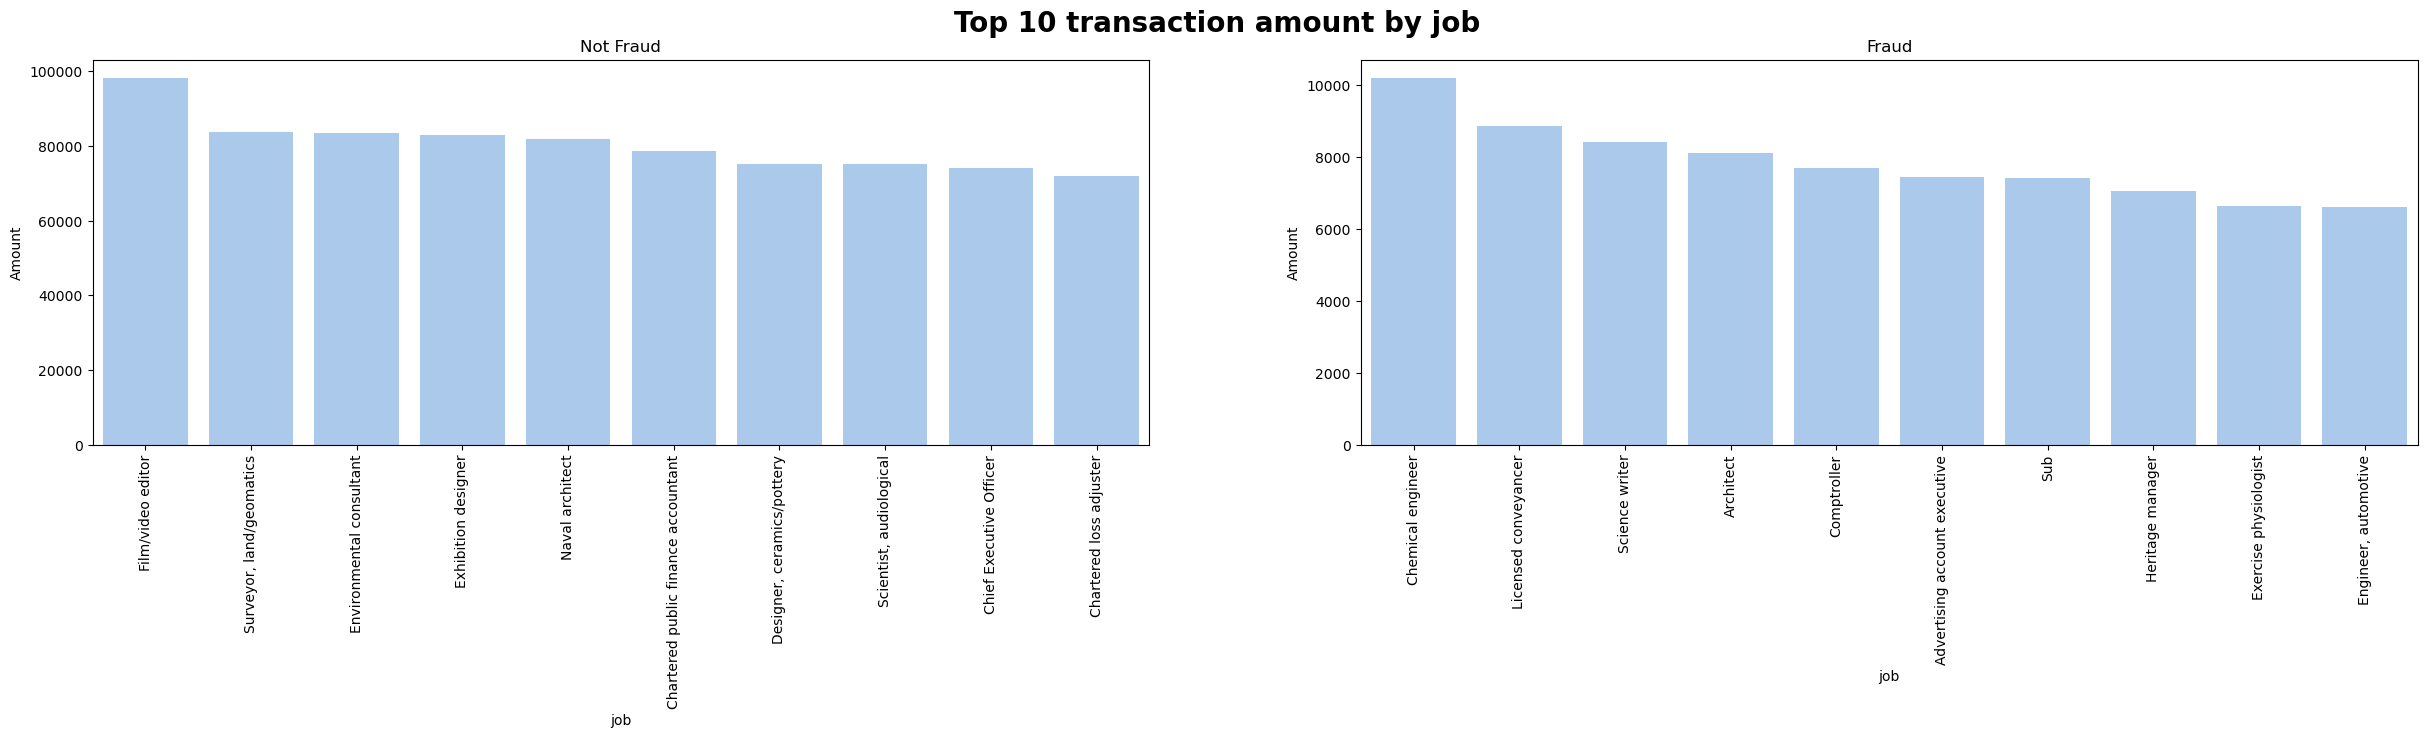

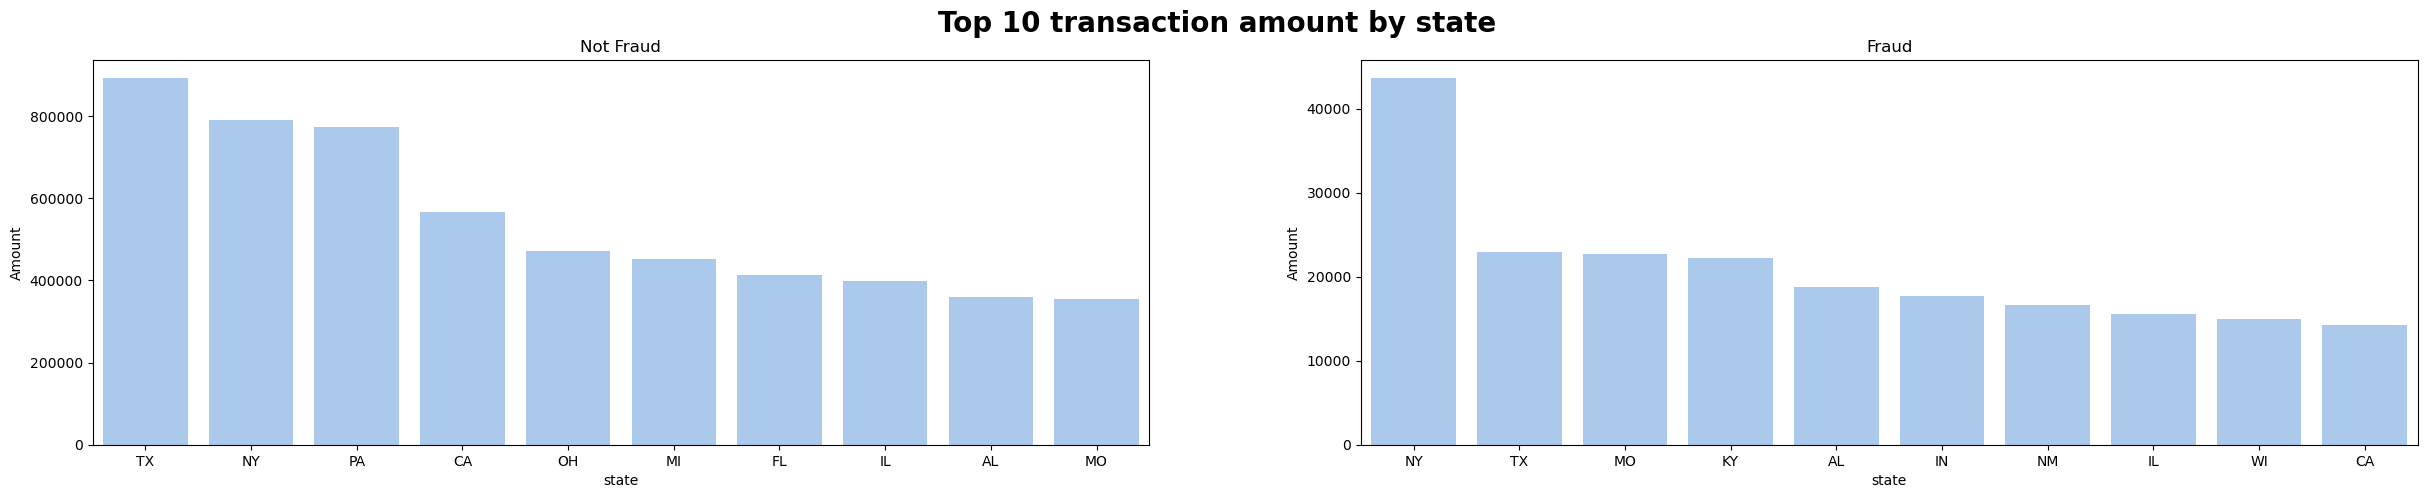

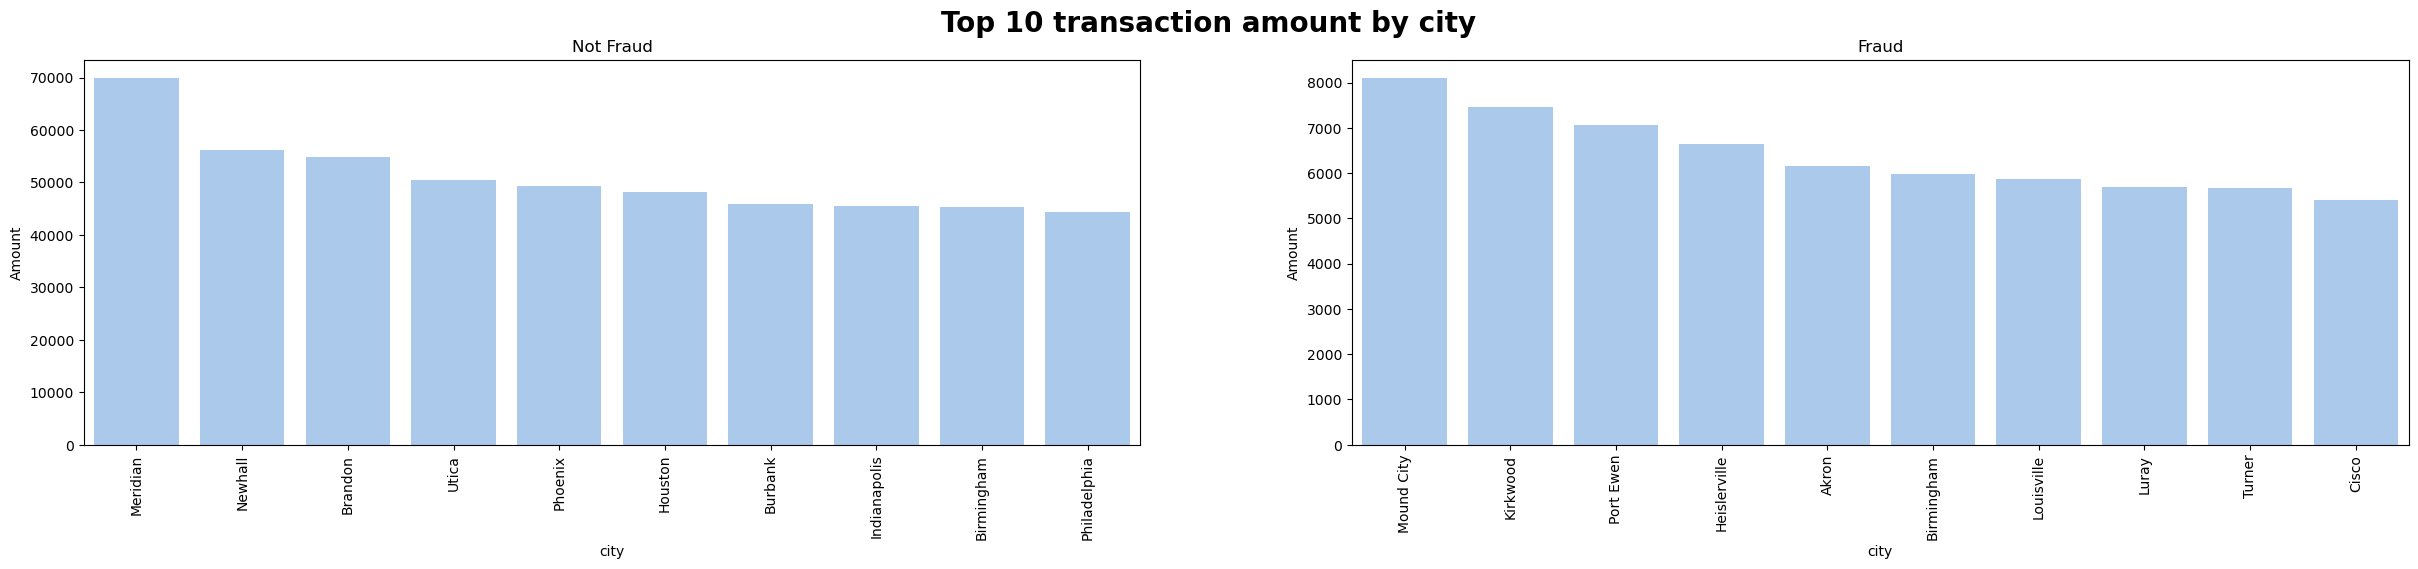

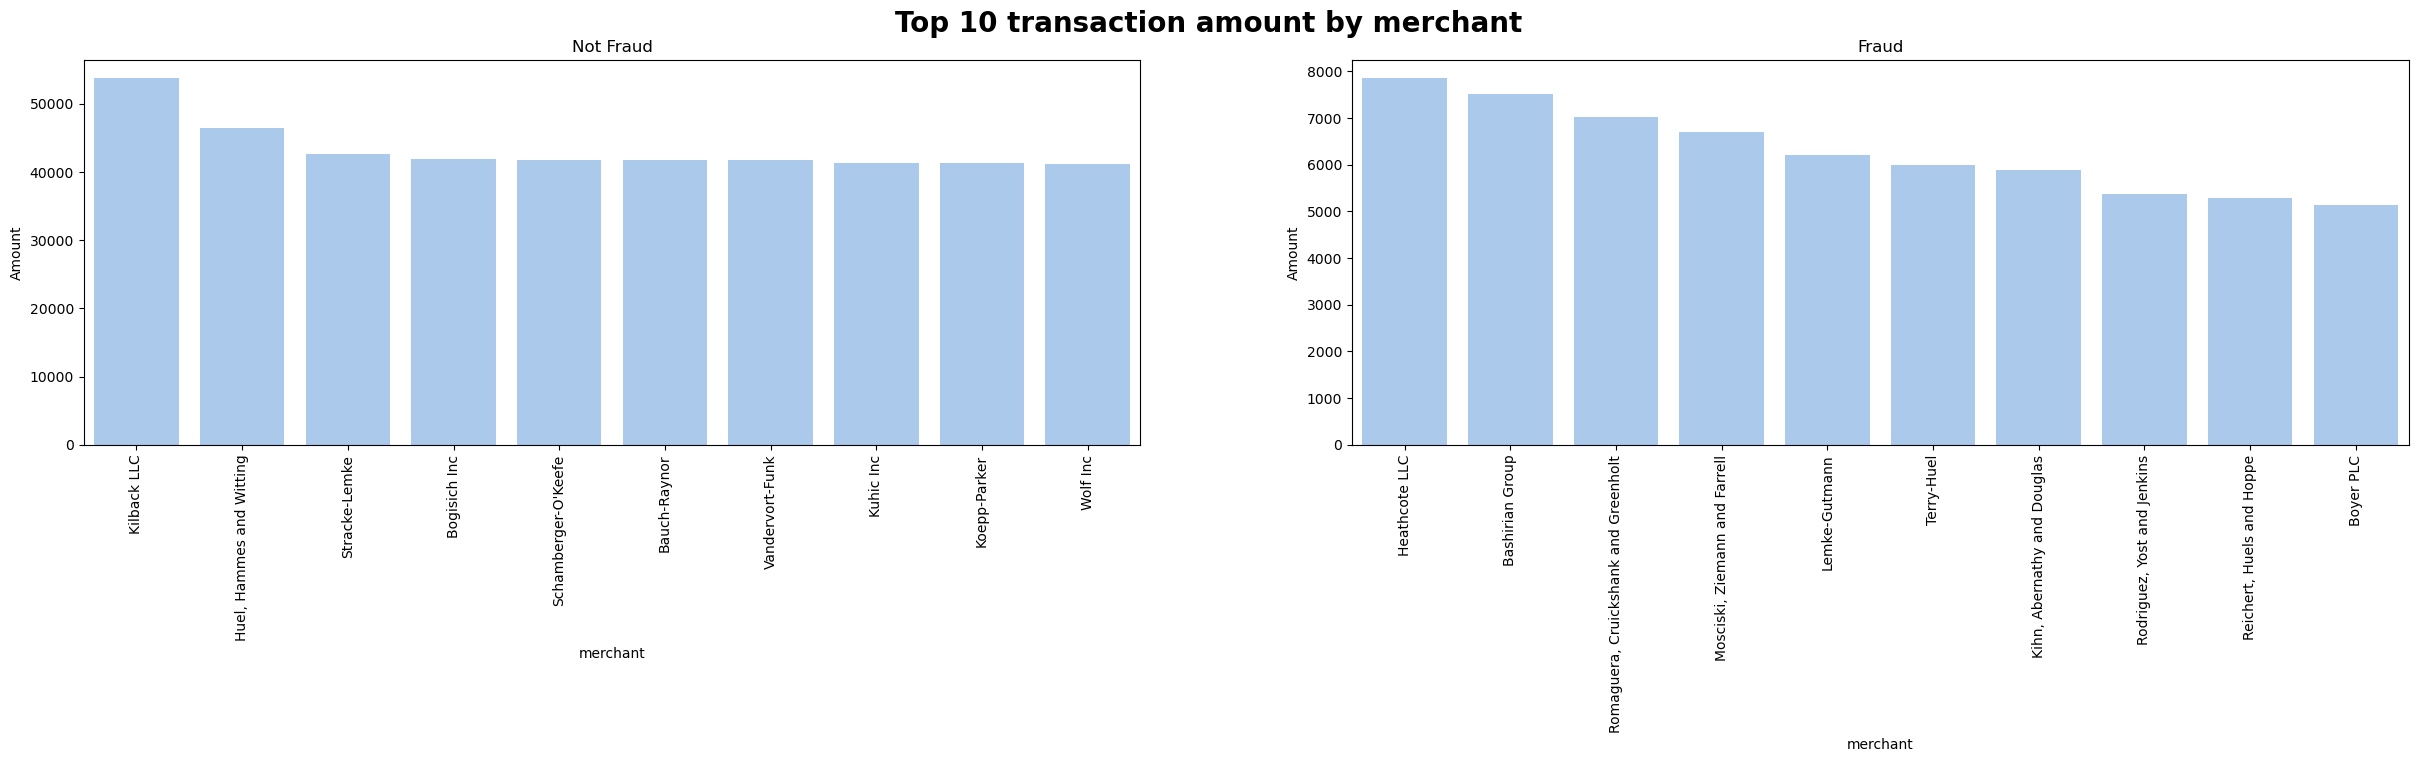

In [35]:
# Top transaction amount
columns = ['job','state','city','merchant']
columns_name = ['job','state','city','merchant']
fraud = ['Not Fraud','Fraud']
y = 0
for col in columns:
    name = columns_name[y]
    y += 1
    fig = plt.figure(figsize=(30, 5))
    plt.suptitle("Top 10 transaction amount by " + name, fontsize=20, fontweight="bold")
    
    for i in range(0,len(fraud)):
        temp_df = eda_df[eda_df['is_fraud'] == i]
        top = temp_df.groupby(col)['amt'].sum().nlargest(10)
        plt.subplot(1,2,1+i)
        ax = sns.barplot(data = top.reset_index(), x=col, y='amt', color='#a1c9f4')
        if (col == 'state'):
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
        else:
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
        plt.ylabel('Amount')
        plt.xlabel(name)
        plt.title(fraud[i])
    plt.show()

When observing 'Top 10 transaction' and 'Top 10 transaction amount' charts, we can see that that share similar pattern. High number of transaction also have high number of amount

## Correlation 

In [36]:
import scipy
from sklearn.preprocessing import LabelEncoder

df_train = eda_df.copy()
le = LabelEncoder()
for columns in eda_df.columns:
    if df_train[columns].dtype == 'object':
        df_train[columns] = le.fit_transform(df_train[columns])

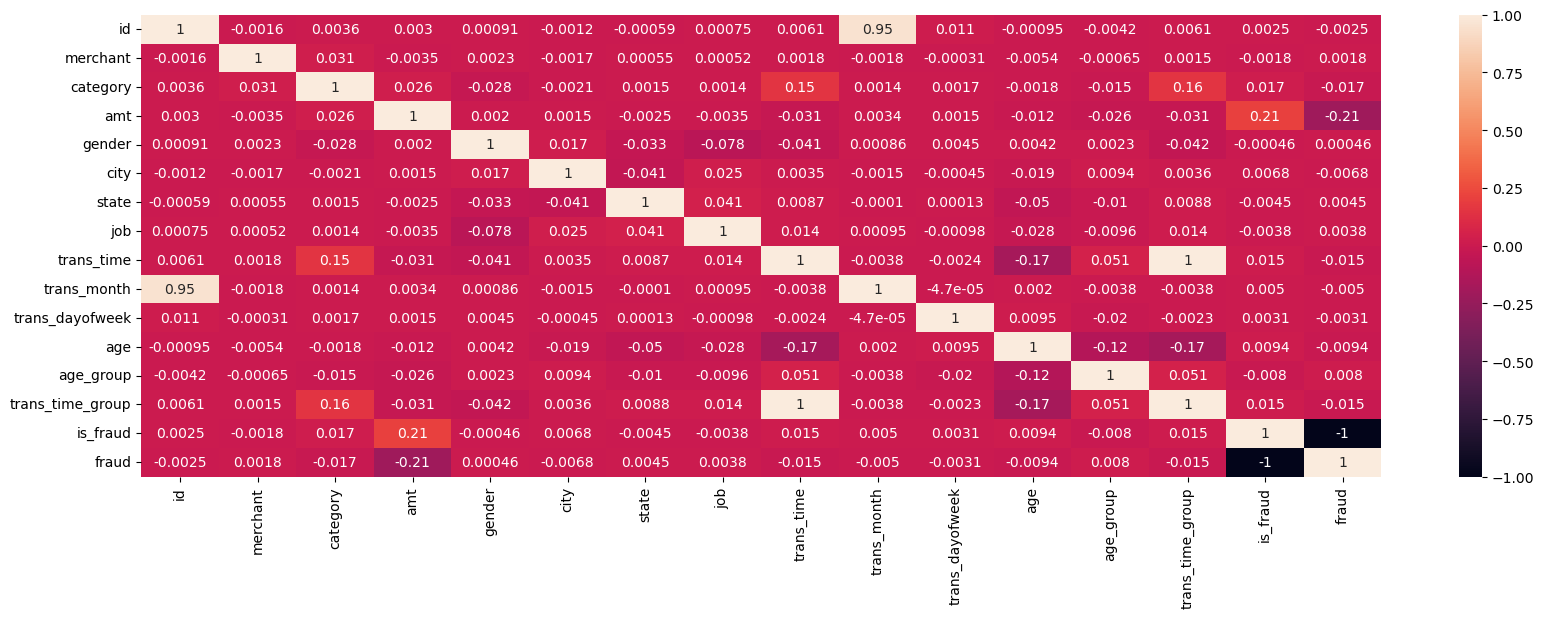

In [37]:
plt.figure(figsize=(20,6))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

# Preprocess Data

## Split numerical and categoric data

In [38]:
# Drop column
X_train = X_train.drop(['trans_time', 'trans_month', 'age_group','id','merchant','job'], axis=1)
X_valid = X_valid.drop(['trans_time', 'trans_month', 'age_group','id', 'merchant','job'], axis=1)
X_test = X_test.drop(['trans_time', 'trans_month', 'age_group','id', 'merchant','job'], axis=1)

In [39]:
# Define numerical data
num_cols = ['amt','age']

# Define categorical
cat_cols = ['category','gender','city','state', 'trans_dayofweek','trans_time_group']

In [40]:
# Split
X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]

In [41]:
X_train_cat.head()

,category,gender,city,state,trans_dayofweek,trans_time_group
216968,shopping_pos,M,Hudson,NY,Sunday,14-15h
198039,gas_transport,F,West Sayville,NY,Sunday,07-8h
57363,grocery_pos,F,Brandon,FL,Saturday,11-12h
292871,shopping_pos,F,Tulsa,OK,Friday,15-16h
125457,shopping_net,F,Oolitic,IN,Monday,22-23h


## Encode categorical data

In [42]:
from sklearn.preprocessing import OneHotEncoder

# Initiate encoder
encoder = OneHotEncoder(drop='if_binary', handle_unknown='ignore')

In [43]:
# Fit encoder to categorical data in train data
encoder.fit(X_train_cat)

OneHotEncoder(drop='if_binary', handle_unknown='ignore')

In [44]:
# Result encoder: feature name example
encoder.get_feature_names_out()

array(['category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M',
       'city_Achille', 'city_Acworth', 'city_Adams', 'city_Afton',
       'city_Akron', 'city_Albany', 'city_Albuquerque', 'city_Alder',
       'city_Aledo', 'city_Alexandria', 'city_Allenhurst',
       'city_Allentown', 'city_Alpharetta', 'city_Altair', 'city_Alton',
       'city_Altona', 'city_Altonah', 'city_Alva', 'city_Amanda',
       'city_American Fork', 'city_Amorita', 'city_Amsterdam',
       'city_Andrews', 'city_Annapolis', 'city_Apison', 'city_Arcadia',
       'city_Arlington', 'city_Armagh', 'city_Armonk', 'city_Arnold',
       'city_Arvada', 'city_Ash Flat', 'city_Ashfield', 'city_Ashford',
       

In [45]:
# Transform
X_train_cat_enc = pd.DataFrame(
    encoder.transform(X_train_cat).toarray(),
    columns = encoder.get_feature_names_out(),
    index = X_train_cat.index
)

X_train_cat_enc.head()

,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,...,trans_time_group_14-15h,trans_time_group_15-16h,trans_time_group_16-17h,trans_time_group_17-18h,trans_time_group_18-19h,trans_time_group_19-20h,trans_time_group_20-21h,trans_time_group_21-22h,trans_time_group_22-23h,trans_time_group_23-24h
216968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198039,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57363,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
292871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
X_train[num_cols]

,amt,age
216968,4.17,22
198039,72.16,30
57363,213.43,42
292871,8.47,49
125457,1.90,29
...,...,...
44486,61.03,34
244734,81.81,47
198950,103.91,61
87440,32.65,66


In [47]:
# Create an imputer, in case someone needs test data
from sklearn.impute import SimpleImputer

def imputerNumeric(data, imputer = None):
    if imputer == None:
        # Create impute
        imputer = SimpleImputer(missing_values = np.nan,
                               strategy = "median")
        imputer.fit(data)
        
    # Transform data
    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data = data_imputed,
                               columns = data.columns,
                               index = data.index)
    
    return data_imputed, imputer

In [48]:
train_imputed, train_imputer = imputerNumeric(data = X_train[num_cols])

### Combine categorical and numerical data

Next, combine the categorical data that has been encoded and concert into numeric

In [49]:
# Join data
X_train_concat = pd.concat((X_train[num_cols].copy(), X_train_cat_enc), axis=1)

# Validate
print('Data shape:', X_train_concat.shape)
X_train_concat.head()

Data shape: (183110, 942)


,amt,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,trans_time_group_14-15h,trans_time_group_15-16h,trans_time_group_16-17h,trans_time_group_17-18h,trans_time_group_18-19h,trans_time_group_19-20h,trans_time_group_20-21h,trans_time_group_21-22h,trans_time_group_22-23h,trans_time_group_23-24h
216968,4.17,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198039,72.16,30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57363,213.43,42,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
292871,8.47,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125457,1.90,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Data Balancing

In [50]:
# Check training set
print('data train old shape:', X_train_concat.shape)

data train old shape: (183110, 942)


In [51]:
# Check the counts of resnponse variable
y_train.value_counts()

is_fraud
0    182279
1       831
Name: count, dtype: int64

The proportion of the response variable, `is_fraud`, is highly imbalanced

We will perform Random Undersampling (RUS)

**Random Undersampling (RUS)**

Perform Random Undersampling using `RandomUnderSampler` package from `imblearn.under_sampling`

In [52]:
from imblearn.under_sampling import RandomUnderSampler

def rus_fit_resample(x, y):

    # Create copy of set data
    x = x.copy()
    y = y.copy()

    # Create sampling object
    rus = RandomUnderSampler(random_state = 42)

    # Balancing data set
    x_rus, y_rus = rus.fit_resample(x, y)

    # Return balanced data set
    return x_rus, y_rus

In [53]:
# Perform RUS
x_rus, y_rus = rus_fit_resample(x = X_train_concat,
                               y = y_train)

<Axes: xlabel='is_fraud', ylabel='count'>

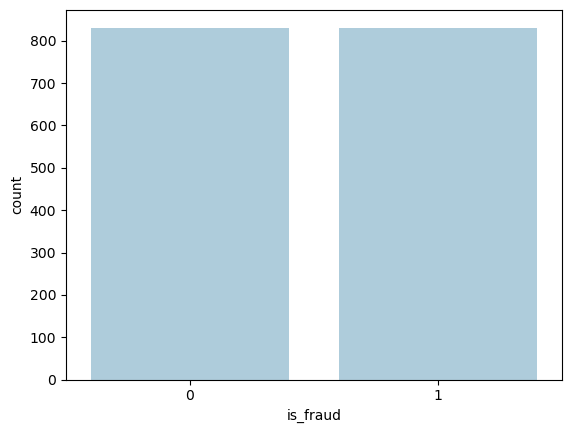

In [54]:
# Check the proportion of response categories
sns.countplot(x = y_rus,
             dodge = False)

In [55]:
# Check the balanced response
y_rus.value_counts()

is_fraud
0    831
1    831
Name: count, dtype: int64

## Modeling

In [56]:
# Import model
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### Original Training Set

**Create Models**

Define model & hyperparameter

In [57]:
model_dict = {
    'baseline': DummyClassifier(),
    'logistic regression': LogisticRegression(),
    'decision tree': DecisionTreeClassifier(random_state=42)
}

hyperparam_dict = {
    'baseline': {'strategy':['most_frequent']},
    'logistic regression': {'class_weight': [None, "balanced"]},
    'decision tree': {'max_depth': [5, 10]}
}

**Hyperparameter Tuning**

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
# Perform modeling
models = []
auc_trains = []
auc_tests = []
best_params = []

for model_name in model_dict.keys():
    # Log
    print('start modeling', model_name)
    
    cv_ = GridSearchCV(estimator = model_dict[model_name],
                      param_grid = hyperparam_dict[model_name],
                      cv =5,
                      scoring = 'roc_auc',
                      return_train_score = True,
                      verbose = 3)
    cv_.fit(X_train_concat, y_train)
    
    auc_trains_ = cv_.cv_results_['mean_train_score'][0]
    auc_tests_ = cv_.best_score_
    best_params_ = cv_.best_params_
    
    # append
    models.append(model_name)
    auc_trains.append(auc_trains_)
    auc_tests.append(auc_tests_)
    best_params.append(best_params_)
    
    # Log
    print('finish modeling', model_name)
    print('')

start modeling baseline
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   3.1s
[CV 2/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   4.0s
[CV 3/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   2.6s
[CV 4/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   4.0s
[CV 5/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   2.9s
finish modeling baseline

start modeling logistic regression
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END class_weight=None;, score=(train=0.934, test=0.937) total time=  35.2s
[CV 2/5] END class_weight=None;, score=(train=0.925, test=0.911) total time=  30.5s
[CV 3/5] END class_weight=None;, score=(train=0.942, test=0.921) total time=  31.4s
[CV 4/5] END class_weight=None;, score=(train=0.939, test=0.931) total time=  35.4s
[CV 5/5] END cl

**Best Parameters**

In [60]:
sum_exp = pd.DataFrame({
    'model': models,
    'AUC train': auc_trains,
    'AUC test': auc_tests,
    'Best param': best_params
})

sum_exp

,model,AUC train,AUC test,Best param
0,baseline,0.500000,0.500000,{'strategy': 'most_frequent'}
1,logistic regression,0.935721,0.962652,{'class_weight': 'balanced'}
2,decision tree,0.858492,0.845397,{'max_depth': 5}


Retraining model with best hyperparameters

In [61]:
lr_best = LogisticRegression(class_weight = "balanced")
lr_best.fit(X_train_concat, y_train)

dt_best = DecisionTreeClassifier(max_depth = 5)
dt_best.fit(X_train_concat, y_train)

DecisionTreeClassifier(max_depth=5)

### RUS Training Set

**Create Models**

Define model & hyperparameter

In [62]:
model_dict = {
    'baseline': DummyClassifier(),
    'logistic regression': LogisticRegression(),
    'decision tree': DecisionTreeClassifier(random_state=42)
}

hyperparam_dict = {
    'baseline': {'strategy':['most_frequent']},
    'logistic regression': {'class_weight': [None, "balanced"]},
    'decision tree': {'max_depth': [5, 10]}
}

**Hyperparameter Tuning**

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
# Perform modeling
models = []
auc_trains = []
auc_tests = []
best_params = []

for model_name in model_dict.keys():
    # Log
    print('start modeling', model_name)
    
    cv_ = GridSearchCV(estimator = model_dict[model_name],
                      param_grid = hyperparam_dict[model_name],
                      cv =5,
                      scoring = 'roc_auc',
                      return_train_score = True,
                      verbose = 3)
    cv_.fit(x_rus, y_rus)
    
    auc_trains_ = cv_.cv_results_['mean_train_score'][0]
    auc_tests_ = cv_.best_score_
    best_params_ = cv_.best_params_
    
    # append
    models.append(model_name)
    auc_trains.append(auc_trains_)
    auc_tests.append(auc_tests_)
    best_params.append(best_params_)
    
    # Log
    print('finish modeling', model_name)
    print('')

start modeling baseline
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.1s
[CV 2/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 3/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 4/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 5/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
finish modeling baseline

start modeling logistic regression
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END class_weight=None;, score=(train=0.980, test=0.962) total time=   0.3s
[CV 2/5] END class_weight=None;, score=(train=0.982, test=0.944) total time=   0.2s
[CV 3/5] END class_weight=None;, score=(train=0.982, test=0.951) total time=   0.3s
[CV 4/5] END class_weight=None;, score=(train=0.983, test=0.966) total time=   0.4s
[CV 5/5] END cl

**Best Parameters**

In [65]:
sum_exp = pd.DataFrame({
    'model': models,
    'AUC train': auc_trains,
    'AUC test': auc_tests,
    'Best param': best_params
})

sum_exp

,model,AUC train,AUC test,Best param
0,baseline,0.500000,0.500000,{'strategy': 'most_frequent'}
1,logistic regression,0.980773,0.957457,{'class_weight': 'balanced'}
2,decision tree,0.974547,0.956505,{'max_depth': 5}


Retraining model with best hyperparameters

In [66]:
lr_best_rus = LogisticRegression(class_weight = "balanced")
lr_best_rus.fit(x_rus, y_rus)

dt_best_rus = DecisionTreeClassifier(max_depth = 5)
dt_best_rus.fit(x_rus, y_rus)

DecisionTreeClassifier(max_depth=5)

## Prediction

To make predictions, we need

- Models
- Data that has been processed

### Preprocess validation and test data

- Preprocess data so that it can be modeled
- So preprocess first, follow the method of preprocessing data when training the model

In [67]:
# Split cat & num
X_valid_num = X_valid[num_cols]
X_valid_cat = X_valid[cat_cols]

# Encode cat
X_valid_cat_enc = pd.DataFrame(encoder.transform(X_valid_cat).toarray(),
                              index = X_valid_cat.index,
                              columns = encoder.get_feature_names_out())

# Concat
X_valid_concat = pd.concat((X_valid_num, X_valid_cat_enc), axis=1)
X_valid_concat

,amt,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,trans_time_group_14-15h,trans_time_group_15-16h,trans_time_group_16-17h,trans_time_group_17-18h,trans_time_group_18-19h,trans_time_group_19-20h,trans_time_group_20-21h,trans_time_group_21-22h,trans_time_group_22-23h,trans_time_group_23-24h
47973,5.06,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73992,48.16,47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252731,36.35,46,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
164569,8.26,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
101869,39.36,54,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106476,146.63,93,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37728,135.61,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232628,832.38,81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5605,9.36,24,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [68]:
# Split cat & num
X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

# Encode cat
X_test_cat_enc = pd.DataFrame(encoder.transform(X_test_cat).toarray(),
                              index = X_test_cat.index,
                              columns = encoder.get_feature_names_out())

# Concat
X_test_concat = pd.concat((X_test_num, X_test_cat_enc), axis=1)
X_test_concat

,amt,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,trans_time_group_14-15h,trans_time_group_15-16h,trans_time_group_16-17h,trans_time_group_17-18h,trans_time_group_18-19h,trans_time_group_19-20h,trans_time_group_20-21h,trans_time_group_21-22h,trans_time_group_22-23h,trans_time_group_23-24h
60097,73.63,67,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1663,26.93,48,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
237436,5.44,24,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
106458,7.17,80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211976,334.50,68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225447,5.07,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142804,120.09,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
292447,6.87,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247527,38.70,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Prediction on Validation Set

In [69]:
from sklearn.metrics import roc_auc_score

# Create list of models and training types
model = ["Logistic Regression",
        "Decision Tree"]

training_set = ["Original", "RUS"]

# Create dataframe
auc_valid = pd.DataFrame(index = training_set, columns = model)
auc_valid

,Logistic Regression,Decision Tree
Original,NaN,NaN
RUS,NaN,NaN


In [70]:
def auc(model, X, y_act):
    # Perform prediction and calculate auc score
    y_pred = model.predict(X)
    auc_score = roc_auc_score(y_act, y_pred)
    
    return auc_score

**Original Training Set**

Logistic Rergression

In [71]:
auc_valid.loc["Original", "Logistic Regression"] = auc(lr_best, X_valid_concat, y_valid)
auc_valid

,Logistic Regression,Decision Tree
Original,0.891083,NaN
RUS,NaN,NaN


Decision Tree

In [72]:
auc_valid.loc["Original", "Decision Tree"] = auc(dt_best, X_valid_concat, y_valid)
auc_valid

,Logistic Regression,Decision Tree
Original,0.891083,0.720019
RUS,NaN,NaN


**RUS Training Set**

Logistic Regression

In [73]:
auc_valid.loc["RUS", "Logistic Regression"] = auc(lr_best_rus, X_valid_concat, y_valid)
auc_valid

,Logistic Regression,Decision Tree
Original,0.891083,0.720019
RUS,0.893336,NaN


Decision Tree

In [74]:
auc_valid.loc["RUS", "Decision Tree"] = auc(dt_best_rus, X_valid_concat, y_valid)
auc_valid

,Logistic Regression,Decision Tree
Original,0.891083,0.720019
RUS,0.893336,0.910801


### Best Model on Train Data

In [75]:
y_train_pred = dt_best_rus.predict(X_train_concat)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
roc = roc_auc_score(y_train, y_train_pred)

print('ROC: ', roc)

ROC:  0.9252912197405112


In [78]:
result = pd.crosstab(y_train_pred,
                    y_train,
                    margins = True)

result

is_fraud,0,1,All
row_0,,,
0,169301,65,169366
1,12978,766,13744
All,182279,831,183110


### Best Model on Validation Data

In [79]:
y_val_pred = dt_best_rus.predict(X_valid_concat)
y_val_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [80]:
roc = roc_auc_score(y_valid, y_val_pred)

print('ROC: ', roc)

ROC:  0.9108006466823366


In [81]:
result  = pd.crosstab(y_val_pred,
            y_valid,
            margins = True)

result

is_fraud,0,1,All
row_0,,,
0,56501,30,56531
1,4259,247,4506
All,60760,277,61037


### Best Model on Test Data

In [82]:
y_test_pred = dt_best_rus.predict(X_test_concat)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
roc = roc_auc_score(y_test, y_test_pred)

print('ROC: ', roc)

ROC:  0.9174036809320212


In [84]:
result  = pd.crosstab(y_test_pred,
                      y_test,
                      margins = True)

result

is_fraud,0,1,All
row_0,,,
0,56426,26,56452
1,4334,251,4585
All,60760,277,61037
